In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [308]:
# Replace 'your_file.csv' with the actual file path or name

file_path = 'Ac_servicing_Orders.xlsx'
Orders = pd.read_excel(file_path)

file_path_1 = 'marketing_Spends.xlsx' 
Marketing = pd.read_excel(file_path_1,sheet_name = 'Sheet4')

file_path_2 = 'weather_data.csv' 
Weather = pd.read_csv(file_path_2)




Orders.head()
Marketing.head()
Weather.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,city
0,2023-01-01,1672511400,30.9,19.0,24.8,30.0,19.0,24.8,17.1,65.9,...,1672535777,17:52:45,1672575765,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['VOHY', '43083099999', '43128599999', 'VOHS',...",obs,Hyderabad
1,2023-01-02,1672597800,29.5,19.0,23.9,29.1,19.0,24.0,17.0,67.3,...,1672622198,17:53:21,1672662201,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['VOHY', '43083099999', '43128599999', 'VOHS',...",obs,Hyderabad
2,2023-01-03,1672684200,28.8,18.0,23.2,28.8,18.0,23.3,16.4,67.5,...,1672708618,17:53:57,1672748637,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['VOHY', '43083099999', '43128599999', 'VOHS',...",obs,Hyderabad
3,2023-01-04,1672770600,27.9,18.0,23.2,27.8,18.0,23.2,16.3,68.0,...,1672795037,17:54:34,1672835074,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['VOHY', '43083099999', '43128599999', 'VOHS',...",obs,Hyderabad
4,2023-01-05,1672857000,26.6,19.0,22.3,26.6,19.0,22.3,17.3,74.1,...,1672881455,17:55:10,1672921510,0.44,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['VOHY', '43083099999', '43128599999', 'VOHS',...",obs,Hyderabad


In [309]:
Weather.columns

Index(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch',
       'moonphase', 'conditions', 'description', 'icon', 'stations', 'source',
       'city'],
      dtype='object')

In [310]:

# Step 1: Keep only numeric columns
weather_numeric = Weather.select_dtypes(include='number').dropna()

# Step 2: Compute correlation matrix
corr_matrix = weather_numeric.corr()

# Step 3: Define a threshold
threshold = 0.75

# Step 4: Get absolute correlations with temp and humidity
corr_with_temp = corr_matrix['temp'].abs()
corr_with_humidity = corr_matrix['humidity'].abs()

# Step 5: Keep features where correlation with both is below threshold
non_redundant_features = corr_with_temp[(corr_with_temp < threshold) & 
                                        (corr_with_humidity < threshold)].index.tolist()

# Remove 'temp' and 'humidity' themselves from the final list
non_redundant_features = [col for col in non_redundant_features if col not in ['temp', 'humidity']]

print("✅ Features that are NOT too correlated with temp & humidity:\n", non_redundant_features)


✅ Features that are NOT too correlated with temp & humidity:
 ['datetimeEpoch', 'dew', 'precip', 'precipprob', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunriseEpoch', 'sunsetEpoch', 'moonphase']


In [311]:
Weather = Weather[['datetime', 'city', 'temp','feelslike','humidity','precip']]


In [312]:
Weather['city'] = Weather['city'].str.upper()


In [313]:
unique_values_weather = Weather['city'].unique()
unique_values_weather


array(['HYDERABAD', 'BANGALORE', 'MUMBAI', 'PUNE', 'CHENNAI', 'GURGAON',
       'GURUGRAM', 'NOIDA', 'DELHI'], dtype=object)

In [314]:
Weather.rename(columns={'datetime': 'date'}, inplace=True)
Weather['city'] = Weather['city'].replace('GURUGRAM', 'GURGAON')

In [315]:
Weather['date'] = pd.to_datetime(Weather['date'])


In [316]:
Weather.head()

,date,city,temp,feelslike,humidity,precip
0,2023-01-01,HYDERABAD,24.8,24.8,65.9,0.0
1,2023-01-02,HYDERABAD,23.9,24.0,67.3,0.0
2,2023-01-03,HYDERABAD,23.2,23.3,67.5,0.0
3,2023-01-04,HYDERABAD,23.2,23.2,68.0,0.0
4,2023-01-05,HYDERABAD,22.3,22.3,74.1,0.0


In [317]:
Marketing.head()

,Row Labels,campaign city,Cost (INR)
0,2023-01-01,All_cities,146966.55
1,2023-01-01,Chennai,44744.43
2,2023-01-01,Hyderabad,219218.52
3,2023-01-02,All_cities,280059.27
4,2023-01-02,Chennai,62375.31


In [318]:
unique_values_marketing = Marketing['campaign city'].unique()
unique_values_marketing


array(['All_cities', 'Chennai', 'Hyderabad', 'Mumbai', 'Delhi',
       'Bangalore', 'DelhiNCR', 'Noida', 'Gurgaon'], dtype=object)

In [319]:
Marketing['campaign city'] = Marketing['campaign city'].replace('All_cities', 'ALLCITIES')

In [320]:
Marketing['campaign city'] = Marketing['campaign city'].replace('DelhiNCR', 'Delhi')
Marketing.rename(columns={'campaign city': 'city', 'Row Labels': 'date'}, inplace=True)

In [321]:
Marketing['city'] = Marketing['city'].str.upper()

In [322]:
Orders.head()

,date_,city,orders
0,2023-01-01,BANGALORE,8118.0
1,2023-01-01,CHENNAI,2970.0
2,2023-01-01,DELHI,693.0
3,2023-01-02,BANGALORE,12969.0
4,2023-01-02,CHENNAI,4356.0


In [323]:
all_cities = Orders.groupby('date_').agg({
    'orders': 'sum',        # Additive
    }).reset_index()

# Add city column as "ALL INDIA"
all_cities['city'] = 'ALL_CITIES'

# Combine with original city-level data
Orders = pd.concat([Orders, all_cities], ignore_index=True)


In [324]:
Orders[Orders['date_'] == '2023-01-01']

,date_,city,orders
0,2023-01-01,BANGALORE,8118.0
1,2023-01-01,CHENNAI,2970.0
2,2023-01-01,DELHI,693.0
3251,2023-01-01,HYDERABAD,3960.0
4208,2023-01-01,MUMBAI,1782.0
5190,2023-01-01,NOIDA,990.0
6111,2023-01-01,PUNE,792.0
7023,2023-01-01,ALL_CITIES,19305.0


In [325]:
unique_values_Orders = Orders['date_'].unique()
unique_values_Orders

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2025-06-21 00:00:00', '2025-06-22 00:00:00', '2025-06-23 00:00:00',
 '2025-06-24 00:00:00', '2025-06-25 00:00:00', '2025-06-26 00:00:00',
 '2025-06-27 00:00:00', '2025-06-28 00:00:00', '2025-06-29 00:00:00',
 '2025-06-30 00:00:00']
Length: 913, dtype: datetime64[ns]

In [326]:
Orders.rename(columns={'date_': 'date'}, inplace=True)

In [327]:
unique_values_Orders = Orders['city'].unique()
unique_values_Orders


array(['BANGALORE', 'CHENNAI', 'DELHI', 'COIMBATORE', 'BANGALORE560068',
       'COIMBATORE, SALEM', 'CHEYYAR, TAMIL NADU, INDIA',
       'BANGALORE GUNTUR, ANDHRA PRADESH, INDIA', 'CHENNAI 600121',
       'CHENNAI, 600011', 'BANGALORE 560049',
       'BANGALORE,MYSORE, KARNATAKA, INDIA', 'BERHAMPUR', nan, 'GURUGRAM',
       'HYDERABAD', 'HYDERABAD 500018', 'HYDERABAD500019', 'INDORE',
       'JAIPUR', 'KALIKIRI', 'KALYAN', 'KARUR', 'KOLKATA',
       'KORUTLA, TELANGANA, INDIA', 'KUPPAM', 'LUCKNOW',
       'MADURAI, TAMIL NADU, INDIA 625001', 'MANGALORE',
       'MAYUR VIHAR PHASE - 3, BLOCK A, KONDLI, NEW DELHI, DELHI, INDIA',
       'MORE', 'MUGAPPAIR WEST, MOGAPPAIR, CHENNAI, TAMIL NADU', 'MUMBAI',
       'MUMBAI CITY', 'MUMBAI,NAGOTHANE', 'NAGERXOIL',
       'NAGPUR, MAHARASHTRA, INDIA', 'NAVI MUMBAI', 'NAVI MUMBAI - NMT',
       'NAVI MUMBAI - THANE', 'NELLORE, ANDHRA PRADESH, 524003INDIA',
       'NEW DELHI', 'NOIDA', 'ORIDISA ', 'PASCHIM VIHAR, DELHI',
       'PATNA CITY CHOWK, 

In [328]:
Orders['city'] = Orders['city'].str.replace(r'[^a-zA-Z \-]', '', regex=True).str.strip()



In [329]:
unique_values_Orders = Orders['city'].unique()
unique_values_Orders


array(['BANGALORE', 'CHENNAI', 'DELHI', 'COIMBATORE', 'COIMBATORE SALEM',
       'CHEYYAR TAMIL NADU INDIA',
       'BANGALORE GUNTUR ANDHRA PRADESH INDIA',
       'BANGALOREMYSORE KARNATAKA INDIA', 'BERHAMPUR', nan, 'GURUGRAM',
       'HYDERABAD', 'INDORE', 'JAIPUR', 'KALIKIRI', 'KALYAN', 'KARUR',
       'KOLKATA', 'KORUTLA TELANGANA INDIA', 'KUPPAM', 'LUCKNOW',
       'MADURAI TAMIL NADU INDIA', 'MANGALORE',
       'MAYUR VIHAR PHASE -  BLOCK A KONDLI NEW DELHI DELHI INDIA',
       'MORE', 'MUGAPPAIR WEST MOGAPPAIR CHENNAI TAMIL NADU', 'MUMBAI',
       'MUMBAI CITY', 'MUMBAINAGOTHANE', 'NAGERXOIL',
       'NAGPUR MAHARASHTRA INDIA', 'NAVI MUMBAI', 'NAVI MUMBAI - NMT',
       'NAVI MUMBAI - THANE', 'NELLORE ANDHRA PRADESH INDIA', 'NEW DELHI',
       'NOIDA', 'ORIDISA', 'PASCHIM VIHAR DELHI',
       'PATNA CITY CHOWK HAJI GANJ PATNA BIHAR', 'PERINTALMANNA',
       'PERUNGUDI MADURAI ST STREET GANAPATHI NAGAR NAMACHIVAYA NAGAR PERUNGUDI MADURAI TAMIL NADU INDIA',
       'PIMPRI-CHINCHWA

In [330]:
Weather.dtypes

date         datetime64[ns]
city                 object
temp                float64
feelslike           float64
humidity            float64
precip              float64
dtype: object

In [331]:
valid_cities = Weather['city'].unique()

# Filter marketing and orders data
Marketing = Marketing[Marketing['city'].isin(valid_cities)]
Orders = Orders[Orders['city'].isin(valid_cities)]

In [332]:
merged_df = pd.merge(Orders, Weather, on=['date', 'city'], how='outer')



In [333]:
merged_df.to_csv('Order_Weather.csv', index=False)


In [334]:
merged_df_order = merged_df['city'].unique()
merged_df_order

array(['BANGALORE', 'CHENNAI', 'DELHI', 'GURGAON', 'HYDERABAD', 'MUMBAI',
       'NOIDA', 'PUNE'], dtype=object)

In [335]:
merged_df[merged_df['city']=='All_CITIES']

,date,city,orders,temp,feelslike,humidity,precip


In [336]:
merged_df = pd.merge(merged_df, Marketing, on=['date', 'city'], how='outer')

In [337]:
merged_df.to_csv('Order_Weather.csv', index=False)


In [338]:
Training.isnull().sum()

date          0
city          0
orders        0
temp          0
feelslike     0
humidity      0
precip        0
Cost (INR)    0
month         0
week          0
month_day     0
year          0
dtype: int64


##Training


In [339]:
Training = merged_df[merged_df['date']<'2025-06-16']

##Part A : Analysis

In [340]:
Training.dtypes

date          datetime64[ns]
city                  object
orders               float64
temp                 float64
feelslike            float64
humidity             float64
precip               float64
Cost (INR)           float64
dtype: object

In [341]:
Training['month'] = Training['date'].dt.to_period('M')
Training['week'] = Training['date'].dt.to_period('W')

In [342]:
Training.head()

,date,city,orders,temp,feelslike,humidity,precip,Cost (INR),month,week
0,2023-01-01,BANGALORE,8118.0,22.0,21.9,65.2,0.0,NaN,2023-01,2022-12-26/2023-01-01
1,2023-01-01,CHENNAI,2970.0,26.3,27.8,79.5,0.0,44744.43,2023-01,2022-12-26/2023-01-01
2,2023-01-01,DELHI,693.0,13.4,13.3,79.8,0.0,NaN,2023-01,2022-12-26/2023-01-01
3,2023-01-01,GURGAON,NaN,13.4,13.3,79.7,0.0,NaN,2023-01,2022-12-26/2023-01-01
4,2023-01-01,GURGAON,NaN,13.4,13.3,79.7,0.0,NaN,2023-01,2022-12-26/2023-01-01


In [343]:
Training['Cost (INR)'] = Training['Cost (INR)'].fillna(0)
Training['orders'] = Training['orders'].fillna(0)

In [344]:
Training.head()

,date,city,orders,temp,feelslike,humidity,precip,Cost (INR),month,week
0,2023-01-01,BANGALORE,8118.0,22.0,21.9,65.2,0.0,0.00,2023-01,2022-12-26/2023-01-01
1,2023-01-01,CHENNAI,2970.0,26.3,27.8,79.5,0.0,44744.43,2023-01,2022-12-26/2023-01-01
2,2023-01-01,DELHI,693.0,13.4,13.3,79.8,0.0,0.00,2023-01,2022-12-26/2023-01-01
3,2023-01-01,GURGAON,0.0,13.4,13.3,79.7,0.0,0.00,2023-01,2022-12-26/2023-01-01
4,2023-01-01,GURGAON,0.0,13.4,13.3,79.7,0.0,0.00,2023-01,2022-12-26/2023-01-01


In [345]:
# Step 1: Extract month and day to use for same-day historical comparison
Training['month_day'] = Training['date'].dt.strftime('%m-%d')
Training['year'] = Training['date'].dt.year

# Step 2: Function to fill missing values using past year's same day value, else month median
def fill_weather_value(group, column):
    for idx, row in group.iterrows():
        if pd.isnull(row[column]):
            # Try past year same day
            past_year = row['year'] - 1
            same_day = row['month_day']
            match = Training[(Training['city'] == row['city']) &
                             (Training['year'] == past_year) &
                             (Training['month_day'] == same_day)][column]
            if not match.isnull().all():
                group.at[idx, column] = match.dropna().values[0]
            else:
                # Fallback: median of that city and month
                month_period = row['date'].to_period('M')
                median_val = Training[(Training['city'] == row['city']) &
                                      (Training['date'].dt.to_period('M') == month_period)][column].median()
                group.at[idx, column] = median_val
    return group

# Step 3: Apply this function for temp, feelslike, and humidity
for col in ['temp', 'feelslike', 'humidity','precip']:
    Training = Training.groupby('city').apply(lambda group: fill_weather_value(group, col)).reset_index(drop=True)

# Final check of nulls
Training[['temp', 'feelslike', 'humidity','precip']].isnull().sum()


temp         0
feelslike    0
humidity     0
precip       0
dtype: int64

In [346]:
Training.to_csv('Cleaned_Order_Weather.csv', index=False)

In [347]:
monthly_city = Training.groupby(['month', 'city'])[['orders','Cost (INR)']].sum().reset_index()
weekly_city = Training.groupby(['week', 'city'])[['orders','Cost (INR)']].sum().reset_index()

In [348]:
monthly_city['MoM_growth'] = monthly_city.groupby('city')['orders'].pct_change() * 100

# WoW % Growth
weekly_city['WoW_growth'] = weekly_city.groupby('city')['orders'].pct_change() * 100

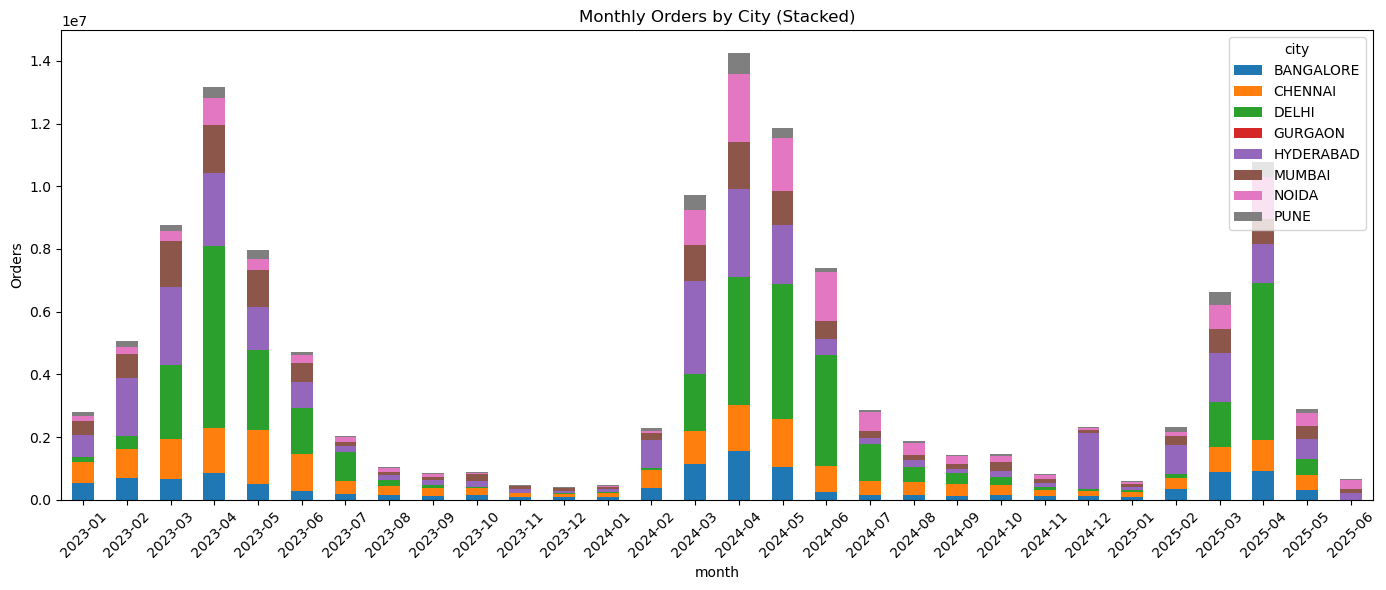

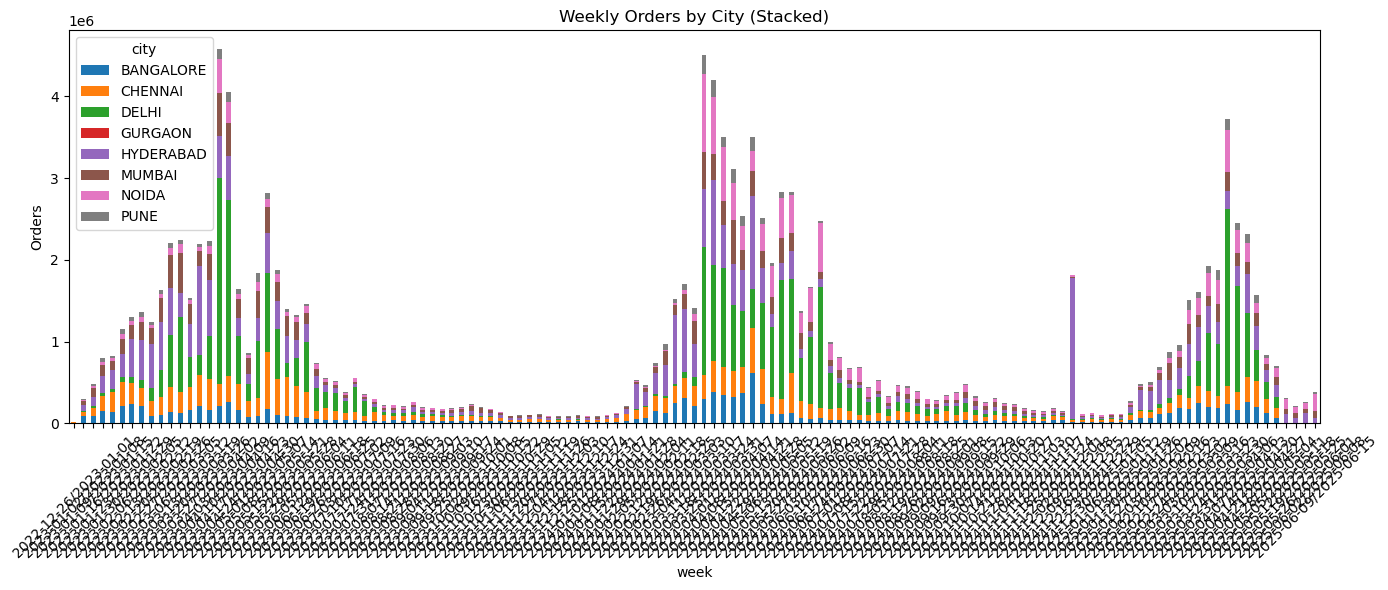

In [349]:
# MoM Stacked Bar
pivot_month = monthly_city.pivot(index='month', columns='city', values='orders')
pivot_month.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Monthly Orders by City (Stacked)')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WoW Stacked Bar
pivot_week = weekly_city.pivot(index='week', columns='city', values='orders')
pivot_week.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Weekly Orders by City (Stacked)')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [350]:
latest_month = monthly_city['month'].max()
latest_week = weekly_city['week'].max()

# Cities with highest MoM/WoW growth
top_mom = monthly_city[monthly_city['month'] == latest_month].sort_values('MoM_growth', ascending=False)
top_wow = weekly_city[weekly_city['week'] == latest_week].sort_values('WoW_growth', ascending=False)

print("🔝 Top Cities by MoM Growth:\n", top_mom[['city', 'orders', 'MoM_growth']].head())
print("\n🔝 Top Cities by WoW Growth:\n", top_wow[['city', 'orders', 'WoW_growth']].head())

🔝 Top Cities by MoM Growth:
           city    orders  MoM_growth
234      NOIDA  296307.0  -32.039055
233     MUMBAI  142560.0  -63.645544
232  HYDERABAD  203643.0  -67.934528
235       PUNE   29403.0  -77.101002

🔝 Top Cities by WoW Growth:
            city    orders  WoW_growth
1022      NOIDA  217602.0  213.105413
1021     MUMBAI   75141.0   34.336283
1023       PUNE   13860.0    3.703704
1020  HYDERABAD   71478.0  -40.771124


In [606]:
monthly_city['month_fmt'] = monthly_city['month'].dt.strftime('%b-%y')

##Top two orders annually

In [616]:
monthly_city['year'] = monthly_city['month'].dt.year

annual_monthly_orders = monthly_city.groupby(['year', 'month_fmt'], as_index=False)['orders'].sum()

In [662]:
Total_annual_orders_city = monthly_city.groupby(['year','city'])['orders'].sum()

sorted_annual_orders = (
    Total_annual_orders_city
    .reset_index()
    .sort_values(by=['orders', 'city'], ascending=[False, True])
    .reset_index(drop=True)
)

print(sorted_annual_orders)

    year       city      orders
0   2024      DELHI  16224813.0
1   2023      DELHI  14086710.0
2   2024  HYDERABAD  11842677.0
3   2023  HYDERABAD  10389555.0
4   2023    CHENNAI   8593497.0
5   2024      NOIDA   8291052.0
6   2024    CHENNAI   7454502.0
7   2025      DELHI   7159185.0
8   2023     MUMBAI   6755166.0
9   2024     MUMBAI   5658444.0
10  2024  BANGALORE   5299371.0
11  2025  HYDERABAD   4678146.0
12  2023  BANGALORE   4310163.0
13  2025      NOIDA   3049200.0
14  2025    CHENNAI   2744379.0
15  2023      NOIDA   2583603.0
16  2025  BANGALORE   2540340.0
17  2025     MUMBAI   2471337.0
18  2024       PUNE   1987524.0
19  2023       PUNE   1472823.0
20  2025       PUNE   1250865.0
21  2023    GURGAON         0.0
22  2024    GURGAON         0.0
23  2025    GURGAON         0.0


In [659]:
Total_annual_orders = monthly_city.groupby('year')['orders'].sum()

Total_annual_orders

year
2023    48191517.0
2024    56758383.0
2025    23893452.0
Name: orders, dtype: float64

In [619]:
top2_months_annual = (
    annual_monthly_orders.sort_values(['year', 'orders'], ascending=[True, False])
    .groupby('year')
    .head(2)
    .reset_index(drop=True)
)
top2_months_annual

,year,month_fmt,orders
0,2023,Apr-23,13175514.0
1,2023,Mar-23,8773974.0
2,2024,Apr-24,14260059.0
3,2024,May-24,11857725.0
4,2025,Apr-25,10771992.0
5,2025,Mar-25,6641910.0


In [607]:
top2_months_city = (
    monthly_city.sort_values(['city', 'orders'], ascending=[True, False])
    .groupby('city')
    .head(2)
    .reset_index(drop=True)
)


In [608]:
top2_months_city

,month,city,orders,Cost (INR),MoM_growth,month_fmt
0,2024-04,BANGALORE,1564992.0,3.746764e+07,38.049079,Apr-24
1,2024-03,BANGALORE,1133649.0,9.546637e+07,211.083945,Mar-24
2,2023-05,CHENNAI,1722303.0,1.707280e+08,21.665851,May-23
3,2024-05,CHENNAI,1542618.0,8.885398e+07,4.830463,May-24
4,2023-04,DELHI,5826051.0,1.883103e+08,145.634026,Apr-23
5,2025-04,DELHI,5005044.0,7.714799e+07,247.702889,Apr-25
6,2023-01,GURGAON,0.0,0.000000e+00,NaN,Jan-23
7,2023-02,GURGAON,0.0,0.000000e+00,NaN,Feb-23
8,2024-03,HYDERABAD,2967129.0,3.825716e+08,225.984338,Mar-24
9,2024-04,HYDERABAD,2812887.0,1.129749e+08,-5.198358,Apr-24


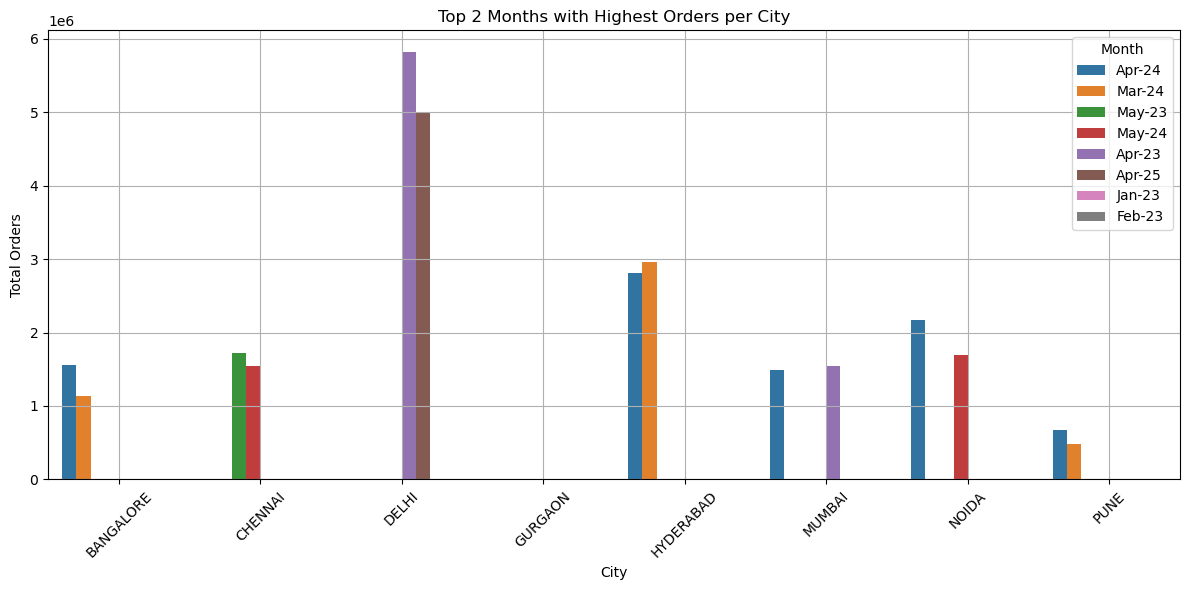

In [609]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top2_months_city, x='city', y='orders', hue='month_fmt')

plt.title('Top 2 Months with Highest Orders per City')
plt.xlabel('City')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.grid(True)
plt.show()

In [621]:
weekly_all

,week,orders,WoW_growth,week_start,month_str,week_num,week_str
0,2022-12-26/2023-01-01,19305.0,NaN,2022-12-26,Dec22,1,W1Dec22
1,2023-01-02/2023-01-08,296406.0,1435.384615,2023-01-02,Jan23,1,W1Jan23
2,2023-01-09/2023-01-15,478269.0,61.356045,2023-01-09,Jan23,2,W2Jan23
3,2023-01-16/2023-01-22,800316.0,67.335955,2023-01-16,Jan23,3,W3Jan23
4,2023-01-23/2023-01-29,824076.0,2.968827,2023-01-23,Jan23,4,W4Jan23
...,...,...,...,...,...,...,...
124,2025-05-12/2025-05-18,699336.0,-16.342965,2025-05-12,May25,2,W2May25
125,2025-05-19/2025-05-25,310959.0,-55.535108,2025-05-19,May25,3,W3May25
126,2025-05-26/2025-06-01,207999.0,-33.110474,2025-05-26,May25,4,W4May25
127,2025-06-02/2025-06-08,259479.0,24.750119,2025-06-02,Jun25,1,W1Jun25


In [351]:
# All-India monthly totals
monthly_all = Training.groupby('month')['orders'].sum().reset_index()
monthly_all['MoM_growth'] = monthly_all['orders'].pct_change() * 100
monthly_all['month_str'] = monthly_all['month'].dt.strftime('%b%y')

# All-India weekly totals
weekly_all = Training.groupby('week')['orders'].sum().reset_index()
weekly_all['WoW_growth'] = weekly_all['orders'].pct_change() * 100
weekly_all['week_start'] = weekly_all['week'].dt.start_time
weekly_all['month_str'] = weekly_all['week_start'].dt.strftime('%b%y')
weekly_all['week_num'] = weekly_all.groupby('month_str').cumcount() + 1
weekly_all['week_str'] = 'W' + weekly_all['week_num'].astype(str) + weekly_all['month_str']

# Top 3 increasing and decreasing months
top_mom = monthly_all.sort_values('MoM_growth', ascending=False).head(3)
bottom_mom = monthly_all.sort_values('MoM_growth').head(3)

# Top 3 increasing and decreasing weeks
top_wow = weekly_all.sort_values('WoW_growth', ascending=False).head(3)
bottom_wow = weekly_all.sort_values('WoW_growth').head(3)


In [623]:
weekly_all['year'] = weekly_all['week_start'].dt.year

top_weeks_yearly = (
    weekly_all.sort_values(['year', 'orders'], ascending=[True, False])
    .groupby('year')
    .head(3)
    .reset_index(drop=True)
)

# Optional: add readable date range
top_weeks_yearly['week_range'] = top_weeks_yearly['week'].astype(str)

top_weeks_yearly

,week,orders,WoW_growth,week_start,month_str,week_num,week_str,year,week_range
0,2022-12-26/2023-01-01,19305.0,NaN,2022-12-26,Dec22,1,W1Dec22,2022,2022-12-26/2023-01-01
1,2023-04-10/2023-04-16,4579146.0,105.482008,2023-04-10,Apr23,2,W2Apr23,2023,2023-04-10/2023-04-16
2,2023-04-17/2023-04-23,4049694.0,-11.562243,2023-04-17,Apr23,3,W3Apr23,2023,2023-04-17/2023-04-23
3,2023-05-15/2023-05-21,2821500.0,53.184628,2023-05-15,May23,3,W3May23,2023,2023-05-15/2023-05-21
4,2024-03-25/2024-03-31,4506876.0,218.728558,2024-03-25,Mar24,4,W4Mar24,2024,2024-03-25/2024-03-31
5,2024-04-01/2024-04-07,4194630.0,-6.928214,2024-04-01,Apr24,1,W1Apr24,2024,2024-04-01/2024-04-07
6,2024-04-08/2024-04-14,3508560.0,-16.355912,2024-04-08,Apr24,2,W2Apr24,2024,2024-04-08/2024-04-14
7,2025-04-07/2025-04-13,3723885.0,98.747754,2025-04-07,Apr25,1,W1Apr25,2025,2025-04-07/2025-04-13
8,2025-04-14/2025-04-20,2448864.0,-34.239000,2025-04-14,Apr25,2,W2Apr25,2025,2025-04-14/2025-04-20
9,2025-04-21/2025-04-27,2314422.0,-5.489974,2025-04-21,Apr25,3,W3Apr25,2025,2025-04-21/2025-04-27


#identigying Growth Streaks for Orders

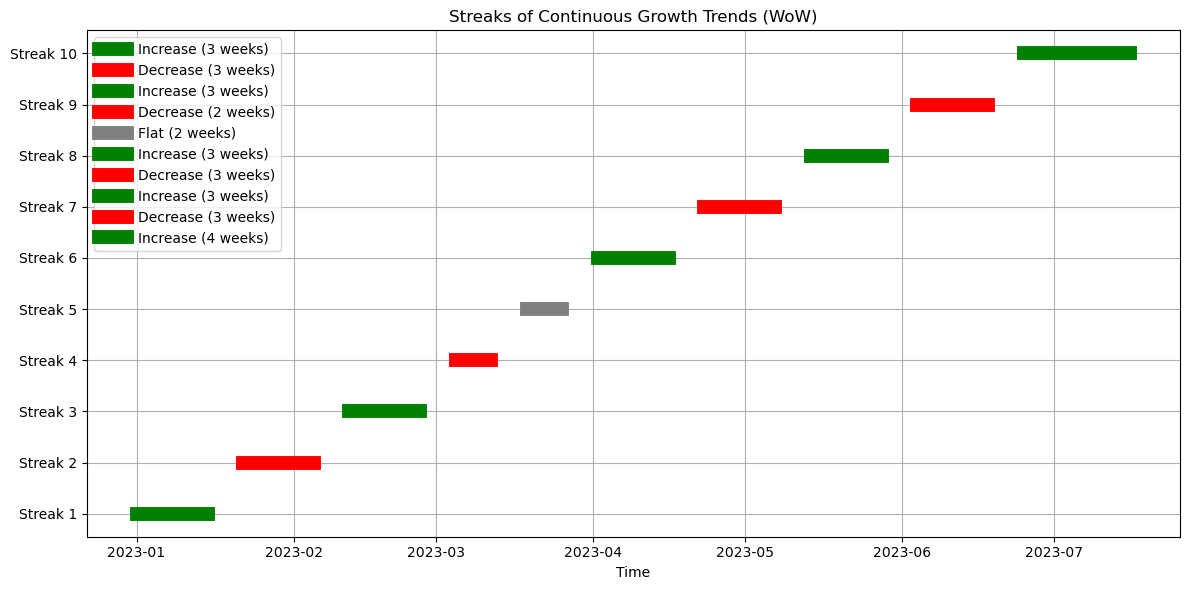

,streak_id,trend,start_date,end_date,length
0,1,increase,2023-01-01,2023-01-15,3
1,2,decrease,2023-01-22,2023-02-05,3
2,3,increase,2023-02-12,2023-02-26,3
3,4,decrease,2023-03-05,2023-03-12,2
4,5,flat,2023-03-19,2023-03-26,2
5,6,increase,2023-04-02,2023-04-16,3
6,7,decrease,2023-04-23,2023-05-07,3
7,8,increase,2023-05-14,2023-05-28,3
8,9,decrease,2023-06-04,2023-06-18,3
9,10,increase,2023-06-25,2023-07-16,4


In [632]:
weekly_all['week'] = pd.to_datetime(weekly_all['week_start']).dt.to_period('W')

# Recompute growth_trend and streaks
weekly_all['growth_trend'] = weekly_all['WoW_growth'].apply(
    lambda x: 'increase' if x > 0 else 'decrease' if x < 0 else 'flat'
)
weekly_all['trend_shift'] = (weekly_all['growth_trend'] != weekly_all['growth_trend'].shift()).cumsum()

# Group to get streaks
streaks = weekly_all.groupby(['trend_shift', 'growth_trend']).agg({
    'week_start': ['min', 'max'],
    'week': 'count'
}).reset_index()

# Rename columns
streaks.columns = ['streak_id', 'trend', 'start_date', 'end_date', 'length']
streaks = streaks[streaks['length'] >= 2]

# Plot the streaks
fig, ax = plt.subplots(figsize=(12, 6))

for i, row in streaks.iterrows():
    ax.plot([row['start_date'], row['end_date']], [i, i], linewidth=10,
            label=f"{row['trend'].capitalize()} ({row['length']} weeks)",
            color='green' if row['trend'] == 'increase' else 'red' if row['trend'] == 'decrease' else 'gray')

ax.set_yticks(range(len(streaks)))
ax.set_yticklabels([f"Streak {i+1}" for i in range(len(streaks))])
ax.set_title("Streaks of Continuous Growth Trends (WoW)")
ax.set_xlabel("Time")
ax.legend(loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

streaks

In [352]:
print("=== Top WoW ===")
print(top_wow)

print("\n=== Bottom WoW ===")
print(bottom_wow)

print("\n=== Top MoM ===")
print(top_mom)

print("\n=== Bottom MoM ===")
print(bottom_mom)

=== Top WoW ===
                      week     orders   WoW_growth week_start month_str  \
1    2023-01-02/2023-01-08   296406.0  1435.384615 2023-01-02     Jan23   
103  2024-12-16/2024-12-22  1820511.0  1154.365621 2024-12-16     Dec24   
65   2024-03-25/2024-03-31  4506876.0   218.728558 2024-03-25     Mar24   

     week_num week_str  
1           1  W1Jan23  
103         3  W3Dec24  
65          4  W4Mar24  

=== Bottom WoW ===
                      week     orders  WoW_growth week_start month_str  \
104  2024-12-23/2024-12-29   119493.0  -93.436293 2024-12-23     Dec24   
78   2024-06-24/2024-06-30   992079.0  -59.846937 2024-06-24     Jun24   
17   2023-04-24/2023-04-30  1646271.0  -59.348262 2023-04-24     Apr23   

     week_num week_str  
104         4  W4Dec24  
78          4  W4Jun24  
17          4  W4Apr23  

=== Top MoM ===
      month     orders  MoM_growth month_str
13  2024-02  2291652.0  389.593909     Feb24
14  2024-03  9728730.0  324.529117     Mar24
25  2025-02  2

In [353]:
important_months = top_mom['month'].tolist() + bottom_mom['month'].tolist()
monthly_city_insights = monthly_city[monthly_city['month'].isin(important_months)]

# Focus on those weeks
important_weeks = top_wow['week'].tolist() + bottom_wow['week'].tolist()
weekly_city_insights = weekly_city[weekly_city['week'].isin(important_weeks)]

In [354]:
Training.head()

,date,city,orders,temp,feelslike,humidity,precip,Cost (INR),month,week,month_day,year
0,2023-01-01,BANGALORE,8118.0,22.0,21.9,65.2,0.0,0.0,2023-01,2022-12-26/2023-01-01,01-01,2023
1,2023-01-02,BANGALORE,12969.0,21.1,21.1,67.8,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-02,2023
2,2023-01-03,BANGALORE,9999.0,20.7,20.7,74.0,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-03,2023
3,2023-01-04,BANGALORE,18216.0,20.7,20.7,75.1,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-04,2023
4,2023-01-05,BANGALORE,9306.0,20.1,20.1,78.3,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-05,2023


In [355]:
top_10_months = monthly_all.sort_values('orders', ascending=False).head(10)
top_20_weeks = weekly_all.sort_values('orders', ascending=False).head(20)

print("🔟 Top 10 Months by Orders:")
print(top_10_months[['month_str', 'orders']].to_string(index=False))

print("\n🔝 Top 20 Weeks by Orders:")
print(top_20_weeks[['week_str', 'orders']].to_string(index=False))

🔟 Top 10 Months by Orders:
month_str     orders
    Apr24 14260059.0
    Apr23 13175514.0
    May24 11857725.0
    Apr25 10771992.0
    Mar24  9728730.0
    Mar23  8773974.0
    May23  7971381.0
    Jun24  7378074.0
    Mar25  6641910.0
    Feb23  5064345.0

🔝 Top 20 Weeks by Orders:
week_str    orders
 W2Apr23 4579146.0
 W4Mar24 4506876.0
 W1Apr24 4194630.0
 W3Apr23 4049694.0
 W1Apr25 3723885.0
 W2Apr24 3508560.0
 W5Apr24 3500046.0
 W3Apr24 3109194.0
 W4May24 2836053.0
 W3May24 2832588.0
 W3May23 2821500.0
 W4Apr24 2538360.0
 W1May24 2509650.0
 W3Jun24 2470743.0
 W2Apr25 2448864.0
 W3Apr25 2314422.0
 W2Mar23 2240667.0
 W1Apr23 2228490.0
 W1Mar23 2209185.0
 W4Mar23 2196909.0


#Understanding Marketing Data

In [638]:
Total_annual

year
2023    3.353081e+09
2024    2.807982e+09
2025    4.753481e+08
Name: Cost (INR), dtype: float64

In [633]:
monthly_city

,month,city,orders,Cost (INR),MoM_growth,month_fmt,year
0,2023-01,BANGALORE,540639.0,0.00,NaN,Jan-23,2023
1,2023-01,CHENNAI,675873.0,6851639.97,NaN,Jan-23,2023
2,2023-01,DELHI,148005.0,2739322.08,NaN,Jan-23,2023
3,2023-01,GURGAON,0.0,0.00,NaN,Jan-23,2023
4,2023-01,HYDERABAD,696861.0,14811401.31,NaN,Jan-23,2023
...,...,...,...,...,...,...,...
231,2025-05,PUNE,128403.0,0.00,-72.567682,May-25,2025
232,2025-06,HYDERABAD,203643.0,0.00,-67.934528,Jun-25,2025
233,2025-06,MUMBAI,142560.0,0.00,-63.645544,Jun-25,2025
234,2025-06,NOIDA,296307.0,0.00,-32.039055,Jun-25,2025


In [663]:
Total_annual = monthly_city.groupby('year')['Cost (INR)'].sum()
Total_annual

year
2023    3.353081e+09
2024    2.807982e+09
2025    4.753481e+08
Name: Cost (INR), dtype: float64

In [642]:
# Convert 'month' from Period to Timestamp
monthly_city['month_ts'] = monthly_city['month'].dt.to_timestamp()

# Group by the timestamp month
monthly_spend = monthly_city.groupby('month_ts')['Cost (INR)'].sum().reset_index()

# Sort to get top months
top_months = monthly_spend.sort_values(by='Cost (INR)', ascending=False).reset_index(drop=True)

# Format for display
top_months['month_str'] = top_months['month_ts'].dt.strftime('%b-%y')

# Show top 10
top_months.head(10)


,month_ts,Cost (INR),month_str
0,2023-03-01,1.095438e+09,Mar-23
1,2024-03-01,1.015562e+09,Mar-24
2,2023-04-01,7.948044e+08,Apr-23
3,2023-05-01,7.014837e+08,May-23
4,2024-05-01,5.924961e+08,May-24
5,2024-04-01,5.660023e+08,Apr-24
6,2024-06-01,3.527270e+08,Jun-24
7,2023-06-01,2.914296e+08,Jun-23
8,2023-02-01,2.841590e+08,Feb-23
9,2025-04-01,2.189398e+08,Apr-25


In [645]:
weekly_city

,week,city,orders,Cost (INR),WoW_growth,week_start,month_str,week_num,week_str
0,2022-12-26/2023-01-01,BANGALORE,8118.0,0.00,NaN,2022-12-26,Dec22,1,W1-Dec22
1,2022-12-26/2023-01-01,CHENNAI,2970.0,44744.43,NaN,2022-12-26,Dec22,2,W2-Dec22
2,2022-12-26/2023-01-01,DELHI,693.0,0.00,NaN,2022-12-26,Dec22,3,W3-Dec22
3,2022-12-26/2023-01-01,GURGAON,0.0,0.00,NaN,2022-12-26,Dec22,4,W4-Dec22
4,2022-12-26/2023-01-01,HYDERABAD,3960.0,219218.52,NaN,2022-12-26,Dec22,5,W5-Dec22
...,...,...,...,...,...,...,...,...,...
1019,2025-06-02/2025-06-08,PUNE,13365.0,0.00,8.870968,2025-06-02,Jun25,4,W4-Jun25
1020,2025-06-09/2025-06-15,HYDERABAD,71478.0,0.00,-40.771124,2025-06-09,Jun25,5,W5-Jun25
1021,2025-06-09/2025-06-15,MUMBAI,75141.0,0.00,34.336283,2025-06-09,Jun25,6,W6-Jun25
1022,2025-06-09/2025-06-15,NOIDA,217602.0,0.00,213.105413,2025-06-09,Jun25,7,W7-Jun25


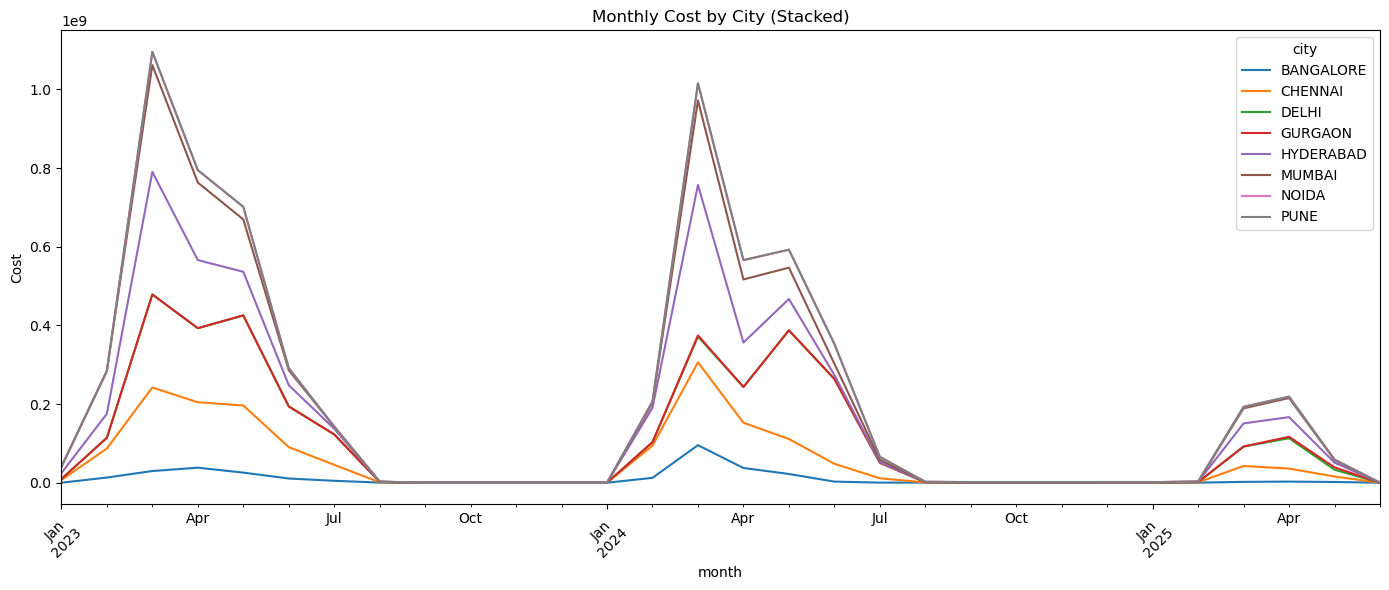

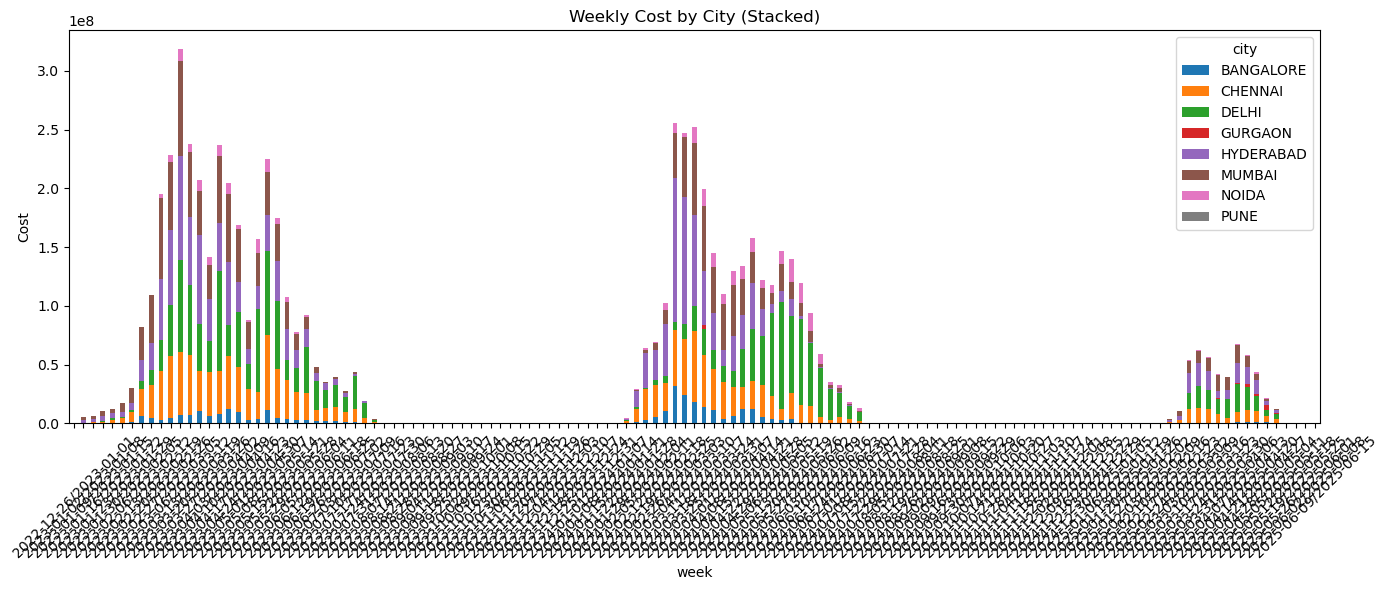

In [647]:
# MoM Stacked Bar
pivot_month = monthly_city.pivot(index='month', columns='city', values='Cost (INR)')
pivot_month.plot(kind='line', stacked=True, figsize=(14, 6))
plt.title('Monthly Cost by City (Stacked)')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WoW Stacked Bar
pivot_week = weekly_city.pivot(index='week', columns='city', values='Cost (INR)')
pivot_week.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Weekly Cost by City (Stacked)')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [656]:
weekly_city.dtypes

week          datetime64[ns]
city                  object
orders               float64
Cost (INR)           float64
WoW_growth           float64
week_start    datetime64[ns]
month_str             object
week_num               int64
week_str              object
dtype: object

In [657]:
weekly_city['year'] = weekly_city['week_start'].dt.year

# Step 2: Group by year and week_start, then sum Cost (INR)
weekly_spend = weekly_city.groupby(['year', 'week_start'])['Cost (INR)'].sum().reset_index()

# Step 3: Get top N weeks per year — e.g., top 3
top_weeks = (
    weekly_spend.sort_values(['year', 'Cost (INR)'], ascending=[True, False])
                .groupby('year')
                .head(3)
                .reset_index(drop=True)
)

# Step 4: Format week_start for display
top_weeks['week_str'] = top_weeks['week_start'].dt.strftime('%d-%b-%y')

# Display result
top_weeks

,year,week_start,Cost (INR),week_str
0,2022,2022-12-26,2.639629e+05,26-Dec-22
1,2023,2023-03-13,3.185481e+08,13-Mar-23
2,2023,2023-03-20,2.380691e+08,20-Mar-23
3,2023,2023-04-10,2.372676e+08,10-Apr-23
4,2024,2024-03-04,2.553441e+08,04-Mar-24
5,2024,2024-03-18,2.518962e+08,18-Mar-24
6,2024,2024-03-11,2.467319e+08,11-Mar-24
7,2025,2025-04-14,6.738512e+07,14-Apr-25
8,2025,2025-03-17,6.249076e+07,17-Mar-25
9,2025,2025-04-21,5.851970e+07,21-Apr-25


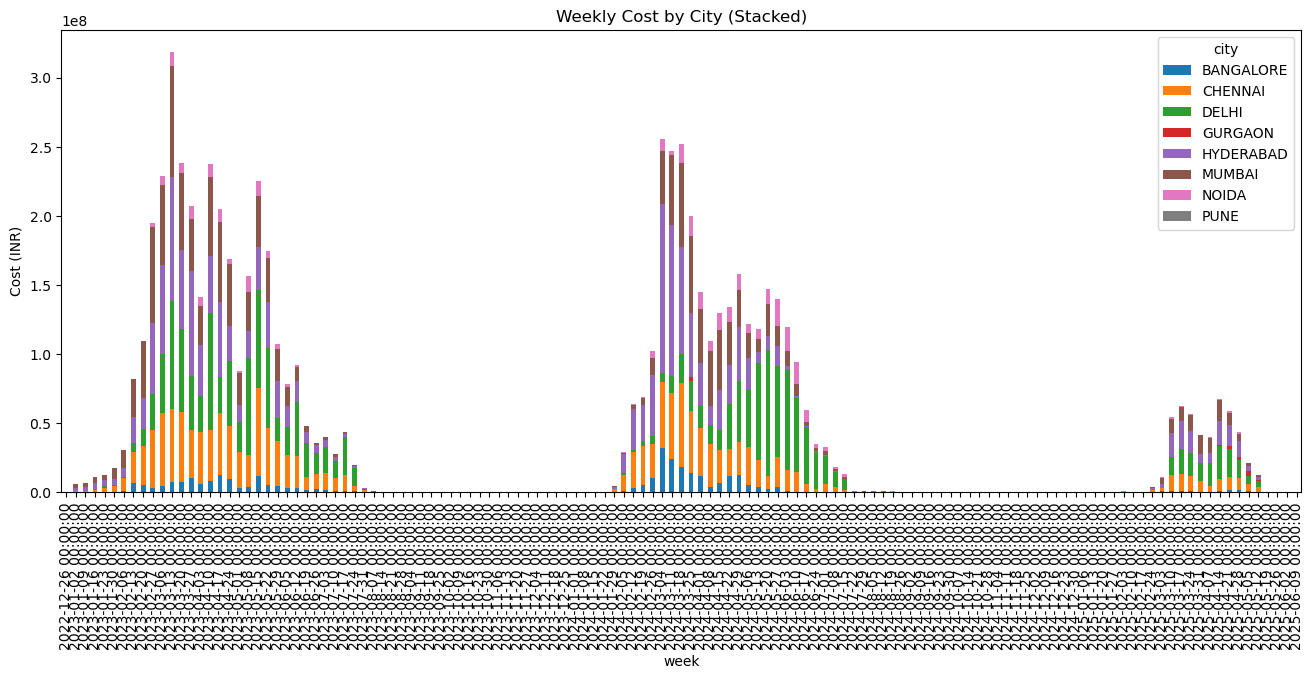

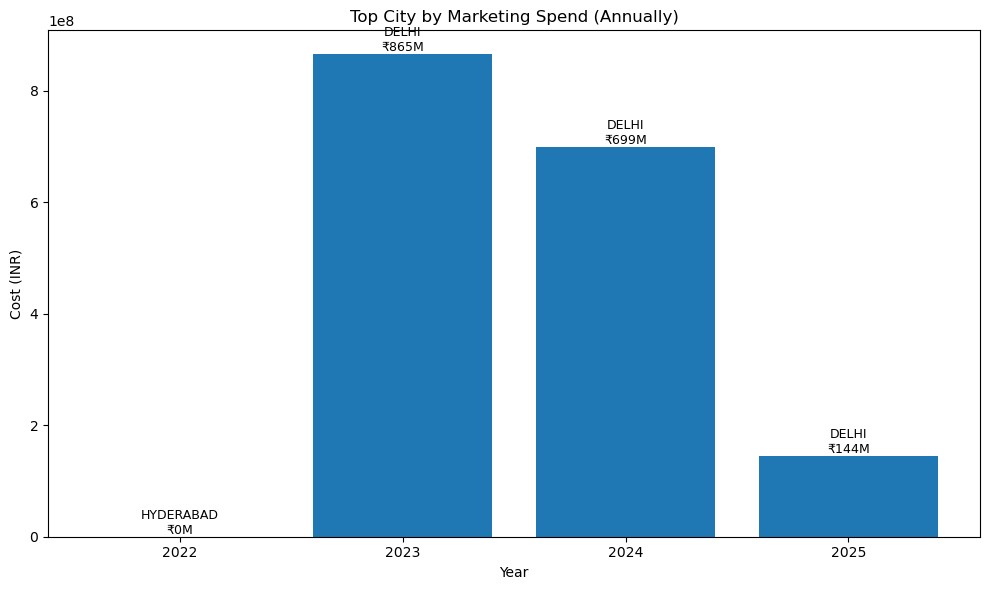

,year,city,Cost (INR)
0,2022,HYDERABAD,2.192185e+05
1,2023,DELHI,8.654561e+08
2,2024,DELHI,6.994043e+08
3,2025,DELHI,1.445468e+08


In [658]:
df = weekly_city.copy()  # Assuming weekly_city is available

# Extract year from 'week_start'
df['year'] = df['week_start'].dt.year

# Group by year and city to get annual marketing spend
annual_city_spend = df.groupby(['year', 'city'])['Cost (INR)'].sum().reset_index()

# Get top city by spend for each year
top_city_per_year = (
    annual_city_spend.sort_values(['year', 'Cost (INR)'], ascending=[True, False])
    .groupby('year')
    .head(1)
    .reset_index(drop=True)
)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_city_per_year['year'].astype(str), top_city_per_year['Cost (INR)'])
plt.title('Top City by Marketing Spend (Annually)')
plt.ylabel('Cost (INR)')
plt.xlabel('Year')

# Annotate bars with city names and values
for bar, city, value in zip(bars, top_city_per_year['city'], top_city_per_year['Cost (INR)']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{city}\n₹{int(value/1e6)}M',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

top_city_per_year

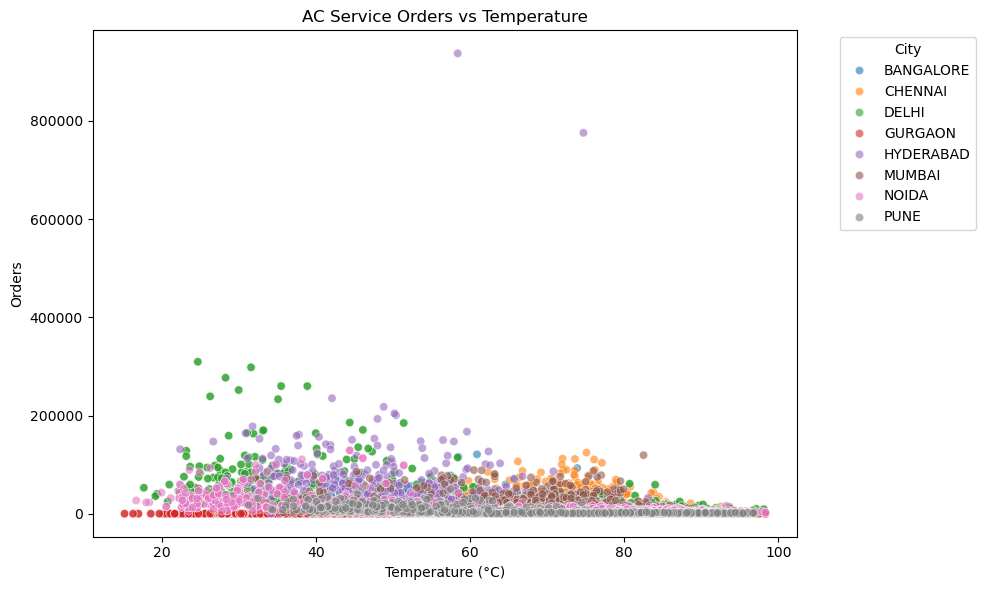

In [358]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Training, x='humidity', y='orders', hue='city', alpha=0.6)
plt.title('AC Service Orders vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Orders')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [359]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_relationship(df, feature, degree=2, model_type='polynomial'):
    data = df.dropna(subset=[feature, 'orders'])
    data = data[data['orders'] > 0]
    
    # Remove outliers using IQR
    Q1 = data['orders'].quantile(0.25)
    Q3 = data['orders'].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data['orders'] <= Q3 + 1.5 * IQR)]

    X = data[[feature]].values
    y = data['orders'].values

    # Choose model
    if model_type == 'ridge':
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        model = Ridge(alpha=1.0)
        model.fit(X_scaled, y)
        x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        x_plot_scaled = scaler.transform(x_plot)
        y_pred = model.predict(x_plot_scaled)
    else:  # polynomial
        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(X, y)
        x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_pred = model.predict(x_plot)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.3, label='Data')
    plt.plot(x_plot, y_pred, color='red', label=f'{model_type.capitalize()} Fit')
    plt.title(f'Orders vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Orders')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Correlation
    corr = data[[feature, 'orders']].corr().iloc[0, 1]
    print(f"📈 Correlation between {feature} and orders: {corr:.3f}")



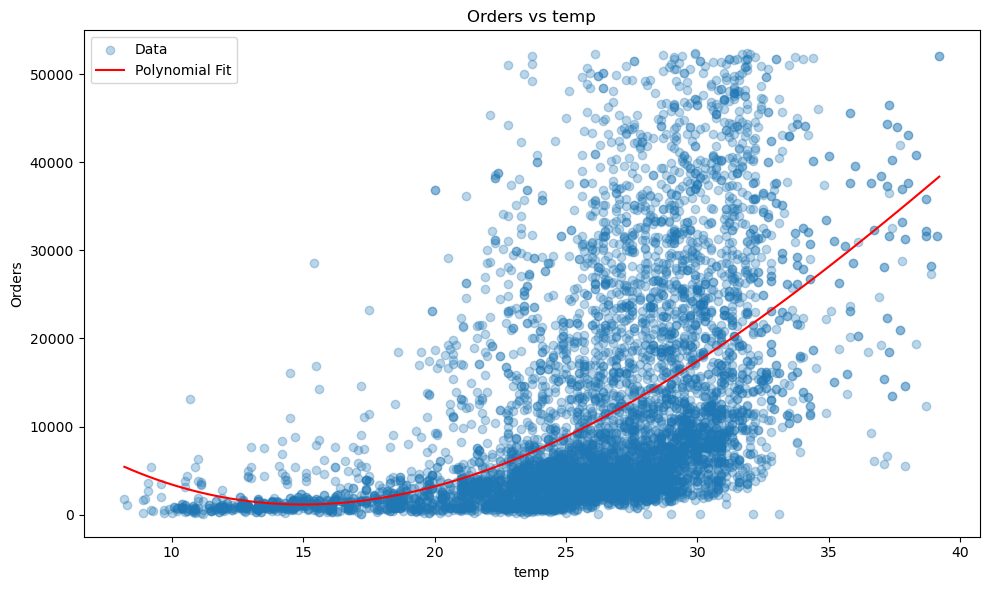

📈 Correlation between temp and orders: 0.490


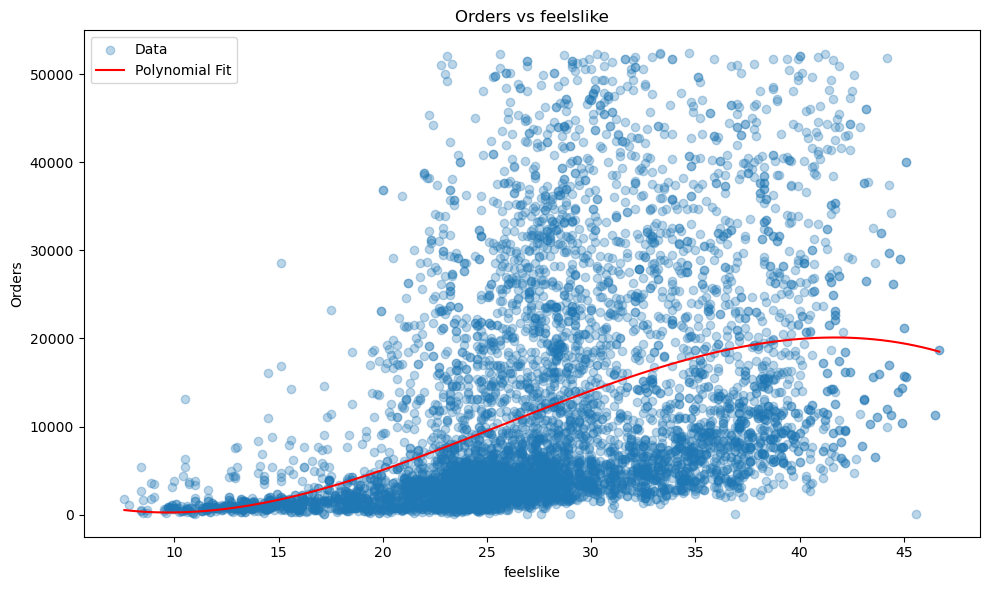

📈 Correlation between feelslike and orders: 0.419


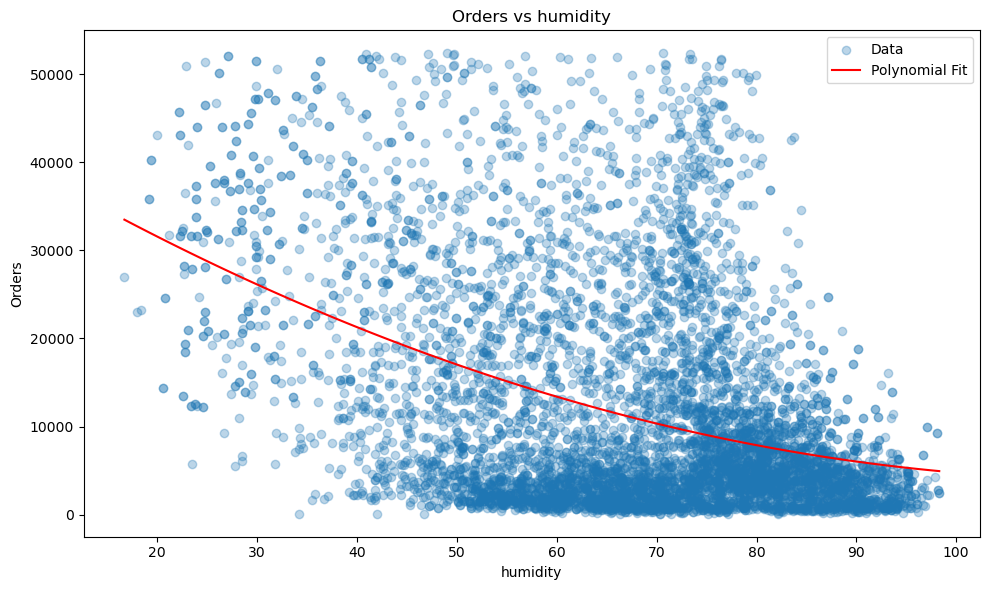

📈 Correlation between humidity and orders: -0.408


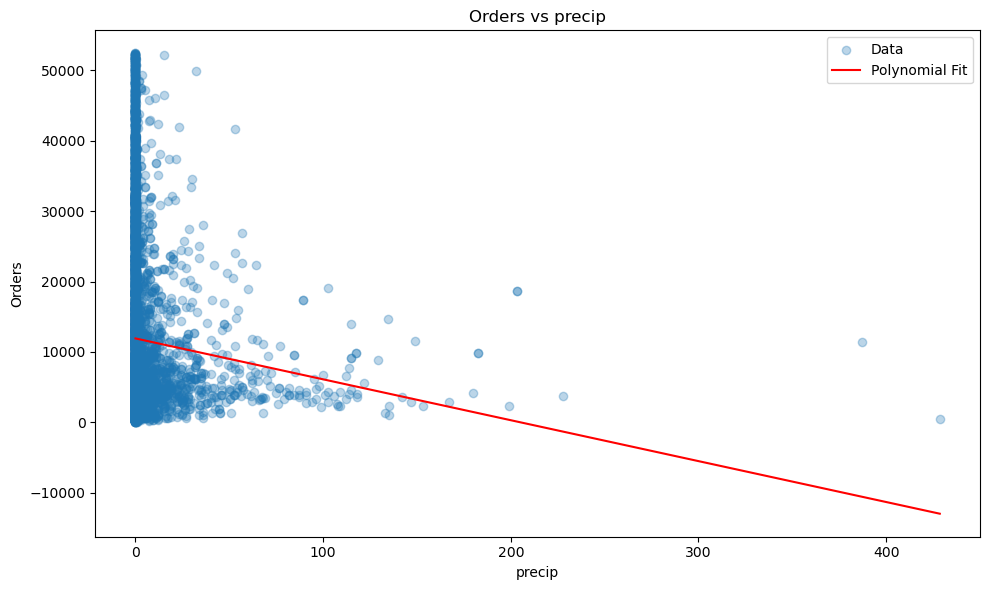

📈 Correlation between precip and orders: -0.075


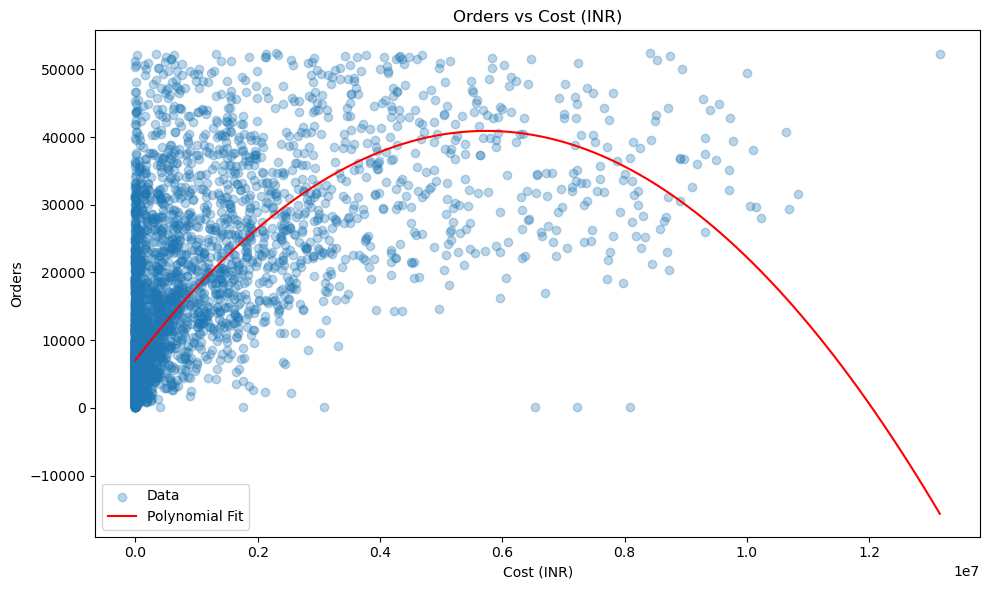

📈 Correlation between Cost (INR) and orders: 0.620


In [360]:
plot_relationship(Training, 'temp', degree=3)
plot_relationship(Training, 'feelslike', degree=3)
plot_relationship(Training, 'humidity', degree=2)
plot_relationship(Training, 'precip', degree=1)
plot_relationship(Training, 'Cost (INR)', degree=2)

In [361]:
from sklearn.linear_model import LinearRegression

X = Training[['temp', 'humidity', 'feelslike', 'Cost (INR)']].dropna()
y = Training.loc[X.index, 'orders']

model = LinearRegression()
model.fit(X, y)

# Show each variable's influence (while controlling for others)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


temp: 771.97
humidity: -265.73
feelslike: -77.42
Cost (INR): 0.01


In [362]:
metrics = ['orders', 'Cost (INR)', 'temp', 'humidity', 'feelslike']

# 1. Weekly Aggregation
weekly_agg = Training.groupby(['city', 'week'])[metrics].agg({
    'orders': 'sum',
    'Cost (INR)': 'sum',
    'temp': 'mean',
    'humidity': 'mean',
    'feelslike': 'mean'
}).reset_index()

# Add efficiency metric
weekly_agg['efficiency'] = weekly_agg['orders'] / (weekly_agg['Cost (INR)'] + 1)  # +1 to avoid division by zero

# 2. Monthly Aggregation
monthly_agg = Training.groupby(['city', 'month'])[metrics].agg({
    'orders': 'sum',
    'Cost (INR)': 'sum',
    'temp': 'mean',
    'humidity': 'mean',
    'feelslike': 'mean'
}).reset_index()

monthly_agg['efficiency'] = monthly_agg['orders'] / (monthly_agg['Cost (INR)'] + 1)

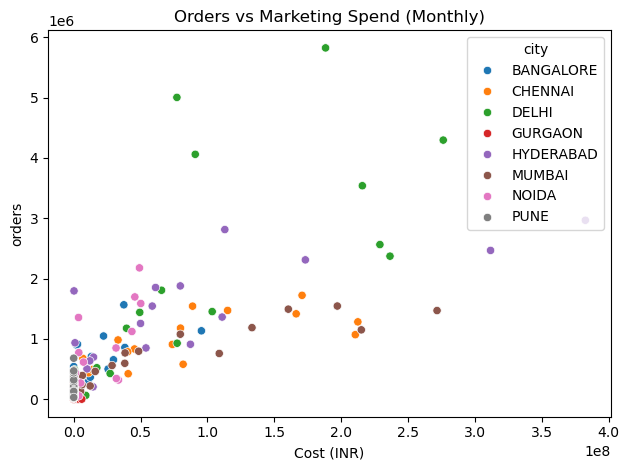

In [363]:
sns.scatterplot(data=monthly_agg, x='Cost (INR)', y='orders', hue='city')
plt.title('Orders vs Marketing Spend (Monthly)')
plt.tight_layout()
plt.show()

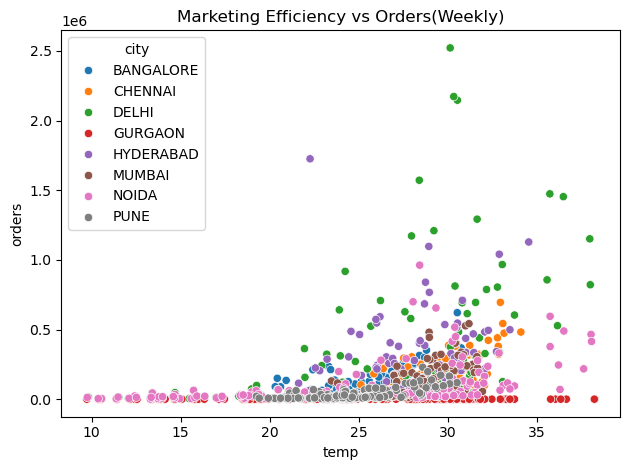

In [364]:
sns.scatterplot(data=weekly_agg, x='temp', y='orders', hue='city')
plt.title('Marketing Efficiency vs Orders(Weekly)')
plt.tight_layout()
plt.show()

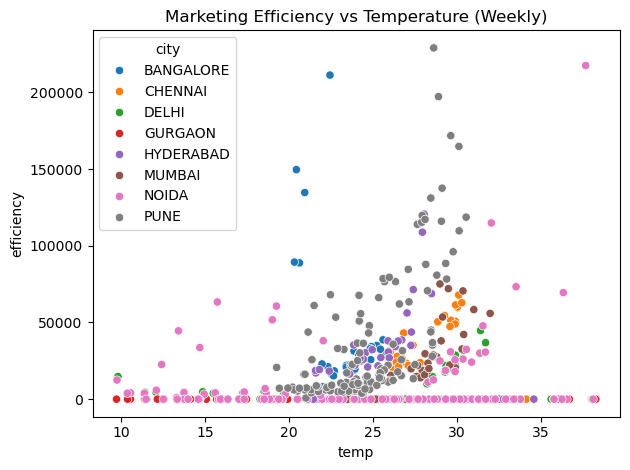

In [365]:
sns.scatterplot(data=weekly_agg, x='temp', y='efficiency', hue='city')
plt.title('Marketing Efficiency vs Temperature (Weekly)')
plt.tight_layout()
plt.show()

In [366]:
Training.head()

,date,city,orders,temp,feelslike,humidity,precip,Cost (INR),month,week,month_day,year
0,2023-01-01,BANGALORE,8118.0,22.0,21.9,65.2,0.0,0.0,2023-01,2022-12-26/2023-01-01,01-01,2023
1,2023-01-02,BANGALORE,12969.0,21.1,21.1,67.8,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-02,2023
2,2023-01-03,BANGALORE,9999.0,20.7,20.7,74.0,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-03,2023
3,2023-01-04,BANGALORE,18216.0,20.7,20.7,75.1,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-04,2023
4,2023-01-05,BANGALORE,9306.0,20.1,20.1,78.3,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-05,2023


# CHECKING IF LAG IS NEEDED FOR MARKETING SPEND DATA (COST-INR)


# RESULT : NO LAG IS NOT NEEDED FOR THIS DATA AS THE BEST CORRELARION IS WITH LAG = 0

In [368]:
monthly_agg = monthly_agg.sort_values(['city', 'month'])

for lag in [0,1, 2, 3,4,]:
    monthly_agg[f'cost_lag_{lag}'] = monthly_agg.groupby('city')['Cost (INR)'].shift(lag)
    corr = monthly_agg[[f'cost_lag_{lag}', 'orders']].corr().iloc[0, 1]
    print(f"Lag {lag} correlation with orders: {corr:.3f}")


Lag 0 correlation with orders: 0.747
Lag 1 correlation with orders: 0.633
Lag 2 correlation with orders: 0.298
Lag 3 correlation with orders: 0.046
Lag 4 correlation with orders: -0.101


In [369]:
weekly_agg = weekly_agg.sort_values(['city', 'week'])

for lag in [0,1, 2, 3,4,]:
    weekly_agg[f'cost_lag_{lag}'] = weekly_agg.groupby('city')['Cost (INR)'].shift(lag)
    corr = weekly_agg[[f'cost_lag_{lag}', 'orders']].corr().iloc[0, 1]
    print(f"Lag {lag} correlation with orders: {corr:.3f}")

Lag 0 correlation with orders: 0.661
Lag 1 correlation with orders: 0.615
Lag 2 correlation with orders: 0.564
Lag 3 correlation with orders: 0.559
Lag 4 correlation with orders: 0.560


#this tells there is no lag in marketing and orders

# WEATHER DATA ANALYSIS

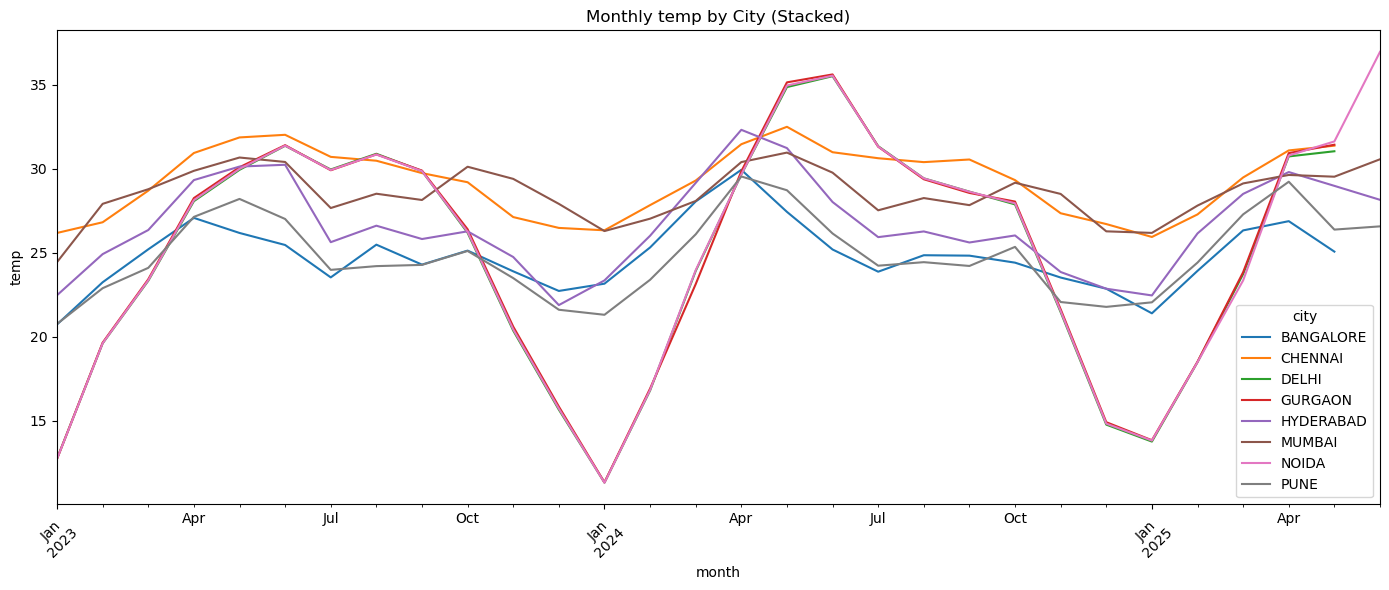

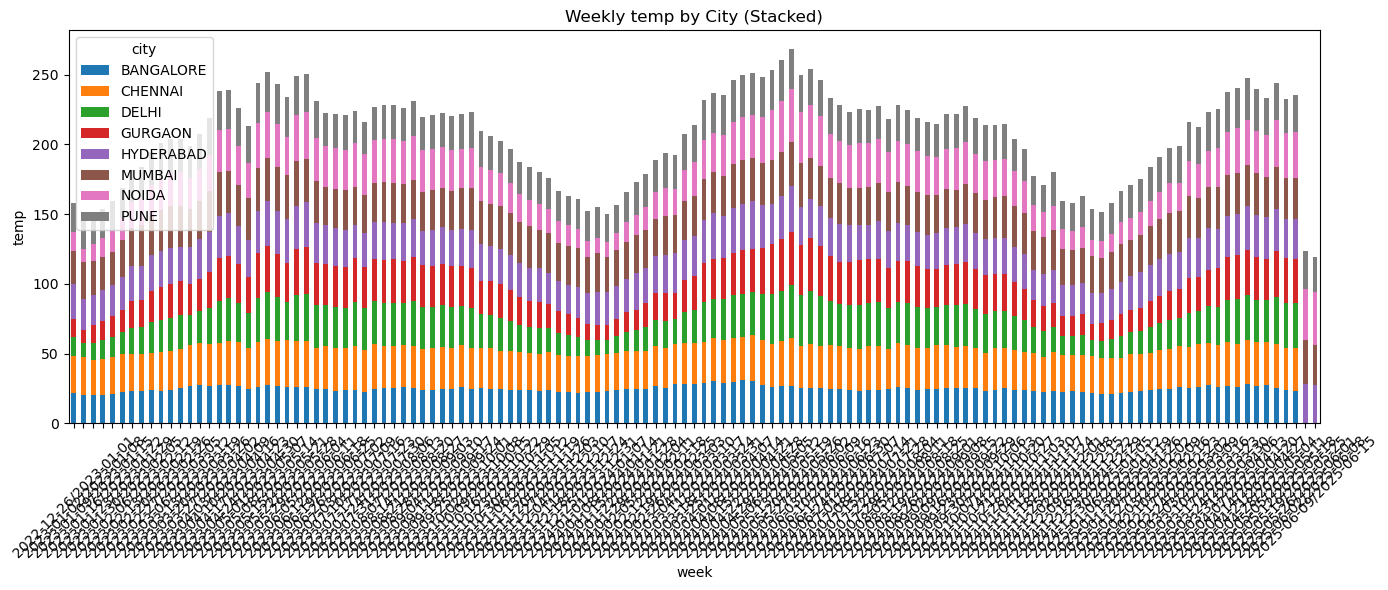

In [375]:
pivot_month_temp = monthly_agg.pivot(index='month', columns='city', values='temp')
pivot_month_temp.plot(kind='line', stacked=False, figsize=(14, 6))
plt.title('Monthly temp by City (Stacked)')
plt.ylabel('temp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WoW Stacked Bar
pivot_week_temp = weekly_agg.pivot(index='week', columns='city', values='temp')
pivot_week_temp.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Weekly temp by City (Stacked)')
plt.ylabel('temp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

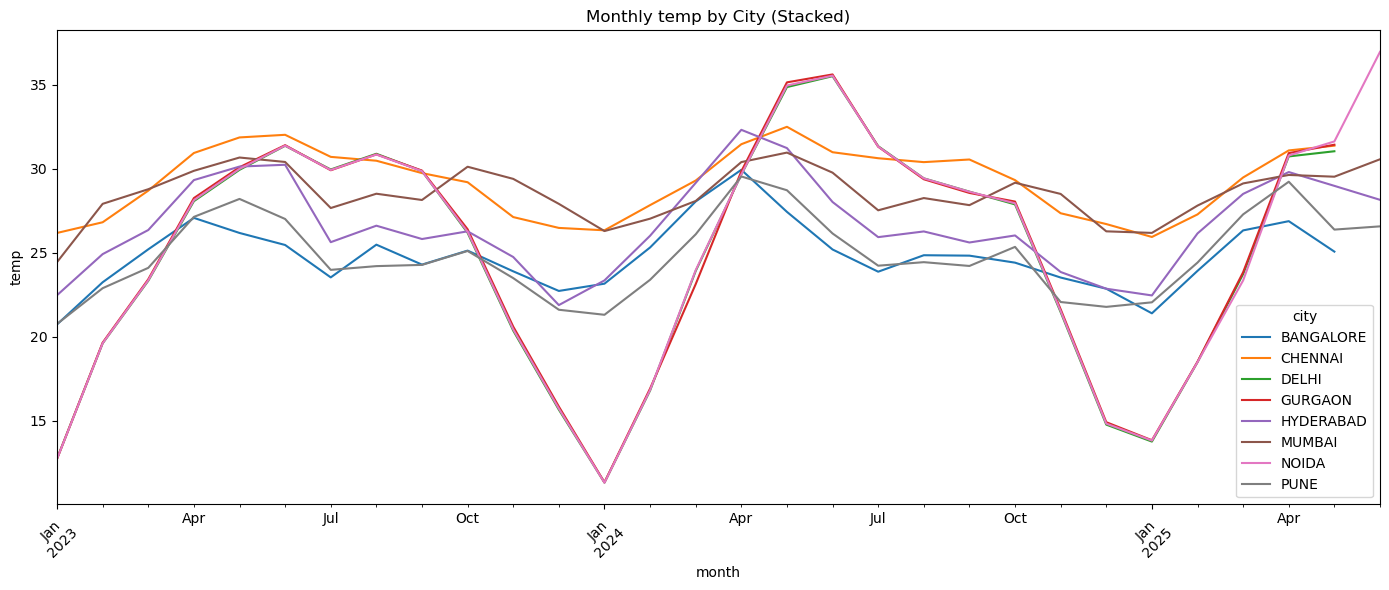

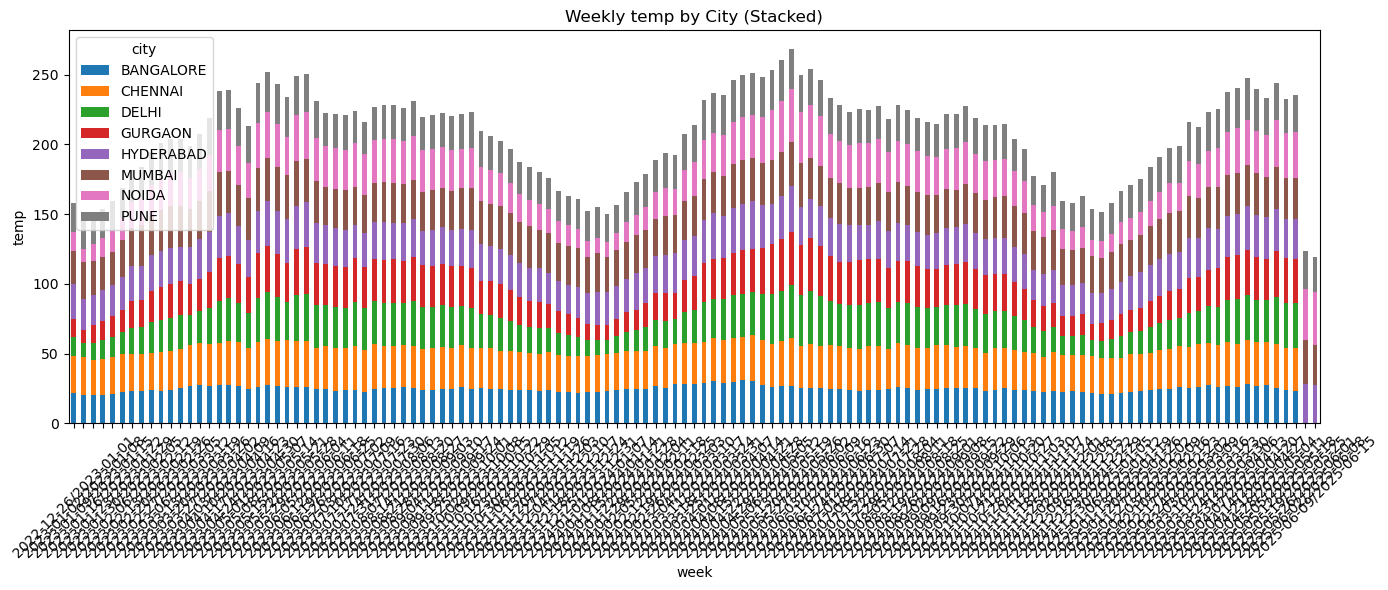

In [376]:
pivot_month_temp_market = monthly_agg.pivot(index='month', columns='city', values='temp')
pivot_month_temp.plot(kind='line', stacked=False, figsize=(14, 6))
plt.title('Monthly temp by City (Stacked)')
plt.ylabel('temp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WoW Stacked Bar
pivot_week_temp = weekly_agg.pivot(index='week', columns='city', values='temp')
pivot_week_temp.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Weekly temp by City (Stacked)')
plt.ylabel('temp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [377]:
##checking correlation in Temp and Cost Marketing

In [378]:
X_corr = monthly_agg[['temp', 'humidity', 'feelslike','orders']].dropna()
y_corr = monthly_agg.loc[X.index, 'Cost (INR)']

# CORRELATION ANALYSIS

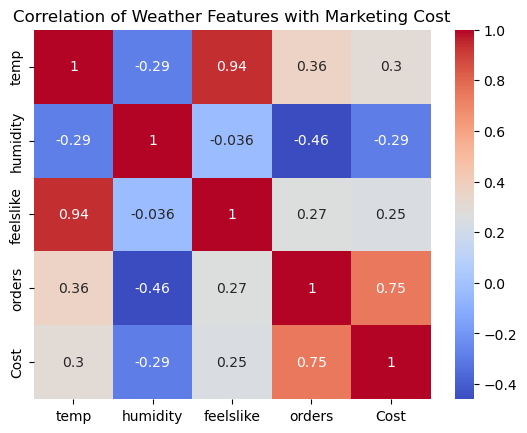

In [379]:
monthly_weather_cost = X.copy()
monthly_weather_cost['Cost'] = y

sns.heatmap(monthly_weather_cost.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Weather Features with Marketing Cost')
plt.show()

In [380]:
##there is good correlation between orders anbd cost , so cost is important to forcast


## Prediction for Marketing Cost 16 May - 30 May --- Not a good Methdod for Prediction (SKIP)


In [599]:
Training.columns

Index(['date', 'city', 'orders', 'temp', 'feelslike', 'humidity', 'precip',
       'Cost (INR)', 'month', 'week', 'month_day', 'year'],
      dtype='object')

In [382]:
Training.head()

,date,city,orders,temp,feelslike,humidity,precip,Cost (INR),month,week,month_day,year
0,2023-01-01,BANGALORE,8118.0,22.0,21.9,65.2,0.0,0.0,2023-01,2022-12-26/2023-01-01,01-01,2023
1,2023-01-02,BANGALORE,12969.0,21.1,21.1,67.8,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-02,2023
2,2023-01-03,BANGALORE,9999.0,20.7,20.7,74.0,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-03,2023
3,2023-01-04,BANGALORE,18216.0,20.7,20.7,75.1,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-04,2023
4,2023-01-05,BANGALORE,9306.0,20.1,20.1,78.3,0.0,0.0,2023-01,2023-01-02/2023-01-08,01-05,2023


In [383]:
current_may[current_may['city']== 'GURGAON']

,date,city,orders,temp,feelslike,humidity,precip,Cost (INR),month,week,month_day,year
4915,2025-05-01,GURGAON,0.0,32.1,33.7,46.9,0.000,141229.89,2025-05,2025-04-28/2025-05-04,05-01,2025
4916,2025-05-01,GURGAON,0.0,32.1,33.7,46.9,0.000,141229.89,2025-05,2025-04-28/2025-05-04,05-01,2025
4917,2025-05-02,GURGAON,0.0,25.5,26.1,69.9,34.504,60241.14,2025-05,2025-04-28/2025-05-04,05-02,2025
4918,2025-05-02,GURGAON,0.0,25.5,26.1,69.9,34.504,60241.14,2025-05,2025-04-28/2025-05-04,05-02,2025
4919,2025-05-03,GURGAON,0.0,28.2,29.1,62.9,0.000,248112.27,2025-05,2025-04-28/2025-05-04,05-03,2025
4920,2025-05-03,GURGAON,0.0,28.2,29.1,62.9,0.000,248112.27,2025-05,2025-04-28/2025-05-04,05-03,2025
4921,2025-05-04,GURGAON,0.0,30.3,31.4,53.3,0.000,95035.08,2025-05,2025-04-28/2025-05-04,05-04,2025
4922,2025-05-04,GURGAON,0.0,30.3,31.4,53.3,0.000,95035.08,2025-05,2025-04-28/2025-05-04,05-04,2025
4923,2025-05-05,GURGAON,0.0,27.5,28.3,57.3,2.237,217292.73,2025-05,2025-05-05/2025-05-11,05-05,2025
4924,2025-05-05,GURGAON,0.0,27.5,28.3,57.3,2.237,217292.73,2025-05,2025-05-05/2025-05-11,05-05,2025


In [384]:
hist_spend_may_later

,city,avg_hist_spend_16_30
0,BANGALORE,7.856375e+05
1,CHENNAI,4.455334e+06
2,DELHI,5.041632e+06
3,GURGAON,0.000000e+00
4,HYDERABAD,3.126938e+06
5,MUMBAI,3.676685e+06
6,NOIDA,9.198664e+05
7,PUNE,0.000000e+00


In [385]:
projected_spend['city'].unique()

array(['BANGALORE', 'CHENNAI', 'DELHI', 'GURGAON', 'HYDERABAD', 'MUMBAI',
       'NOIDA', 'PUNE'], dtype=object)

In [387]:
# Step 1: Compute spend ratio till May 15 (2025 vs previous years)
historical_may = Training[
    (Training['date'].dt.month == 5) &
    (Training['date'].dt.day <= 15) &
    (Training['date'].dt.year < 2025)
]

current_may = Training[
    (Training['date'].dt.month == 5) &
    (Training['date'].dt.day <= 15) &
    (Training['date'].dt.year == 2025)]

may_later_hist = Training[(Training['date'].dt.month == 5) & 
                    (Training['date'].dt.day >= 16) & 
                    (Training['date'].dt.day <= 30) & 
                    (Training['date'].dt.year < 2025)]

hist_spend_may_later = may_later_hist.groupby('city')['Cost (INR)'].mean().reset_index()
hist_spend_may_later.rename(columns={'Cost (INR)': 'avg_hist_spend_16_30'}, inplace=True)


# Calculate spend ratio for each city
ratio_series = current_may.groupby('city')['Cost (INR)'].sum() / historical_may.groupby('city')['Cost (INR)'].sum()
ratio_df = ratio_series.reset_index()
ratio_df.columns = ['city', 'spend_ratio_2025_to_hist']


# Merge and calculate projected spend
projected_spend = pd.merge(hist_spend_may_later, ratio_df, on='city', how='left')
projected_spend['predicted_spend_16_30'] = projected_spend['avg_hist_spend_16_30'] * projected_spend['spend_ratio_2025_to_hist']

# Final result
projected_spend = projected_spend[['city', 'predicted_spend_16_30']]
projected_spend.fillna(0, inplace=True)


In [388]:
projected_spend

,city,predicted_spend_16_30
0,BANGALORE,65221.873155
1,CHENNAI,545327.257460
2,DELHI,451476.196299
3,GURGAON,0.000000
4,HYDERABAD,410325.366824
5,MUMBAI,244693.289752
6,NOIDA,36867.223705
7,PUNE,0.000000


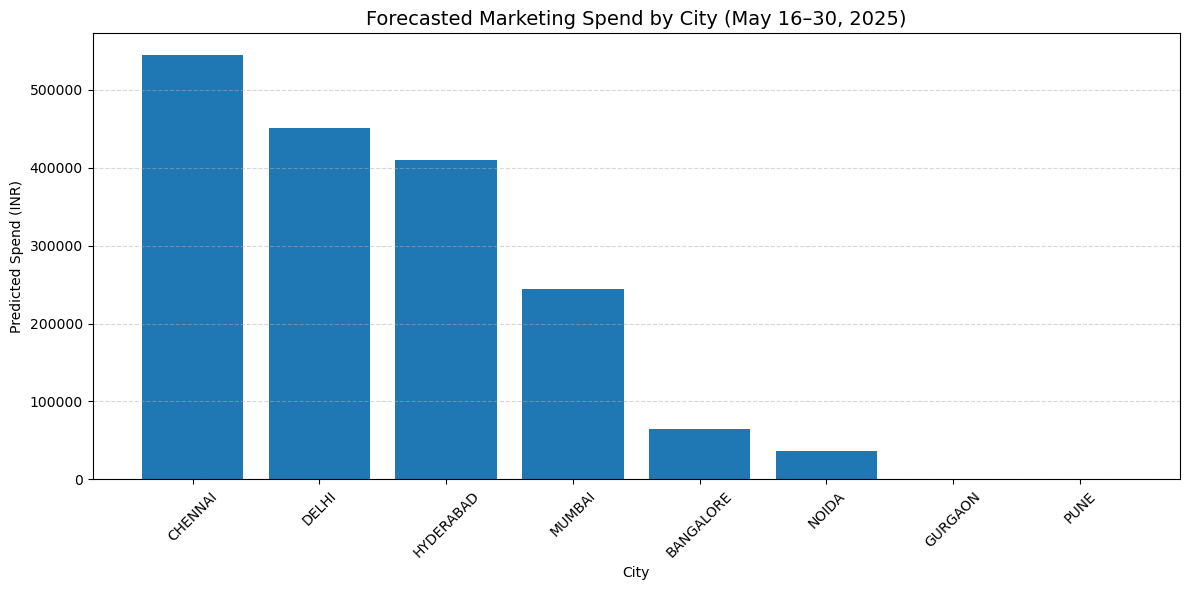

In [389]:
import matplotlib.pyplot as plt

# Sort by predicted spend for better readability
projected_spend_sorted = projected_spend.sort_values(by='predicted_spend_16_30', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(projected_spend_sorted['city'], projected_spend_sorted['predicted_spend_16_30'])

plt.title('Forecasted Marketing Spend by City (May 16–30, 2025)', fontsize=14)
plt.xlabel('City')
plt.ylabel('Predicted Spend (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [390]:
forecast_dates = pd.date_range(start='2025-05-16', end='2025-05-30')

# Step 2: Cross join cities with dates
cities = projected_spend['city'].unique()
forecast_df = pd.DataFrame([(city, date) for city in cities for date in forecast_dates], columns=['city', 'date'])

# Step 3: Merge predicted spend per city
forecast_df = pd.merge(forecast_df, projected_spend, on='city', how='left')

# Step 4: Distribute total city spend equally over 15 days
forecast_df['daily_predicted_spend'] = forecast_df['predicted_spend_16_30'] / 15

# Optional: final output columns
forecast_df = forecast_df[['city', 'date', 'daily_predicted_spend']]

# MODEL STARTS

In [667]:
Model = Training.sort_values('date').reset_index(drop=True)
Model = Model[Model['date'] < '2025-06-15']


# Extract time-based features

Model['month'] = Model['date'].dt.month
Model['year'] = Model['date'].dt.year
Model['day'] = Model['date'].dt.day
Model['weekday'] = Model['date'].dt.weekday         # 0 = Monday
Model['weekofyear'] = Model['date'].dt.isocalendar().week
Model['is_weekend'] = Model['weekday'].isin([5, 6]).astype(int)
Model['dayofyear'] = Model['date'].dt.dayofyear


In [668]:
Model.head()

,date,city,orders,temp,feelslike,humidity,precip,Cost (INR),month,week,month_day,year,day,weekday,weekofyear,is_weekend,dayofyear
0,2023-01-01,BANGALORE,8118.0,22.0,21.9,65.2,0.0,0.0,1,2022-12-26/2023-01-01,01-01,2023,1,6,52,1,1
1,2023-01-01,PUNE,792.0,21.0,20.8,60.4,0.0,0.0,1,2022-12-26/2023-01-01,01-01,2023,1,6,52,1,1
2,2023-01-01,GURGAON,0.0,13.4,13.3,79.7,0.0,0.0,1,2022-12-26/2023-01-01,01-01,2023,1,6,52,1,1
3,2023-01-01,GURGAON,0.0,13.4,13.3,79.7,0.0,0.0,1,2022-12-26/2023-01-01,01-01,2023,1,6,52,1,1
4,2023-01-01,MUMBAI,1782.0,23.6,23.6,58.5,0.0,0.0,1,2022-12-26/2023-01-01,01-01,2023,1,6,52,1,1


In [676]:
from sklearn.model_selection import train_test_split
X = Model.drop(['orders','month_day','week','date','Cost (INR)','feelslike'], axis=1)
y = Model['orders']
 

In [677]:
X.head()

,city,temp,humidity,precip,month,year,day,weekday,weekofyear,is_weekend,dayofyear
0,BANGALORE,22.0,65.2,0.0,1,2023,1,6,52,1,1
1,PUNE,21.0,60.4,0.0,1,2023,1,6,52,1,1
2,GURGAON,13.4,79.7,0.0,1,2023,1,6,52,1,1
3,GURGAON,13.4,79.7,0.0,1,2023,1,6,52,1,1
4,MUMBAI,23.6,58.5,0.0,1,2023,1,6,52,1,1


In [671]:
len(Model['city'].unique())

8

In [672]:
Model['city'].value_counts()

city
GURGAON      1762
DELHI        1447
NOIDA        1251
HYDERABAD     898
PUNE          896
MUMBAI        896
BANGALORE     883
CHENNAI       883
Name: count, dtype: int64

In [673]:
(Model['Cost (INR)'] == 0).sum().sum()

np.int64(3879)

In [678]:
X_Market = X[['city', 'temp', 'humidity', 'precip',
       'month', 'year', 'day', 'weekday', 'weekofyear', 'is_weekend',
       'dayofyear']]

Y_Market = Model['Cost (INR)']

In [680]:
X.columns

Index(['city', 'temp', 'humidity', 'precip', 'month', 'year', 'day', 'weekday',
       'weekofyear', 'is_weekend', 'dayofyear'],
      dtype='object')

In [681]:
X['city'].value_counts()

city
GURGAON      1762
DELHI        1447
NOIDA        1251
HYDERABAD     898
PUNE          896
MUMBAI        896
BANGALORE     883
CHENNAI       883
Name: count, dtype: int64

In [682]:
num_features_market = X_Market.select_dtypes(exclude="object").columns
label_columns_Market = ['city']

from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import OrdinalEncoder

numeric_transformer_market = StandardScaler()
ordinal_encoder_market=OrdinalEncoder()

preprocessor_market = ColumnTransformer(
    [
        ("OrdinalEncoder", ordinal_encoder_market, label_columns_Market),
        ("StandardScaler", numeric_transformer_market, num_features_market)
    ],
    remainder='passthrough'
)

In [683]:
num_features = X.select_dtypes(exclude="object").columns
label_columns = ['city']

from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import OrdinalEncoder

numeric_transformer = StandardScaler()
ordinal_encoder=OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder", ordinal_encoder, label_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'
)

In [684]:
pd.DataFrame(X)

,city,temp,humidity,precip,month,year,day,weekday,weekofyear,is_weekend,dayofyear
0,BANGALORE,22.0,65.2,0.0,1,2023,1,6,52,1,1
1,PUNE,21.0,60.4,0.0,1,2023,1,6,52,1,1
2,GURGAON,13.4,79.7,0.0,1,2023,1,6,52,1,1
3,GURGAON,13.4,79.7,0.0,1,2023,1,6,52,1,1
4,MUMBAI,23.6,58.5,0.0,1,2023,1,6,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8911,NOIDA,38.9,22.7,0.0,6,2025,13,4,24,0,164
8912,HYDERABAD,28.0,70.9,2.5,6,2025,14,5,24,1,165
8913,NOIDA,37.8,28.4,0.0,6,2025,14,5,24,1,165
8914,PUNE,25.6,82.9,0.1,6,2025,14,5,24,1,165


In [685]:
pd.DataFrame(X_Market)

,city,temp,humidity,precip,month,year,day,weekday,weekofyear,is_weekend,dayofyear
0,BANGALORE,22.0,65.2,0.0,1,2023,1,6,52,1,1
1,PUNE,21.0,60.4,0.0,1,2023,1,6,52,1,1
2,GURGAON,13.4,79.7,0.0,1,2023,1,6,52,1,1
3,GURGAON,13.4,79.7,0.0,1,2023,1,6,52,1,1
4,MUMBAI,23.6,58.5,0.0,1,2023,1,6,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8911,NOIDA,38.9,22.7,0.0,6,2025,13,4,24,0,164
8912,HYDERABAD,28.0,70.9,2.5,6,2025,14,5,24,1,165
8913,NOIDA,37.8,28.4,0.0,6,2025,14,5,24,1,165
8914,PUNE,25.6,82.9,0.1,6,2025,14,5,24,1,165


In [686]:
X=preprocessor.fit_transform(X)

In [687]:
X_Market = preprocessor_market.fit_transform(X_Market)

In [688]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,-0.721747,-0.008016,-0.237948,-1.446109,-1.097041,-1.664921,1.501263,1.880519,1.583936,-1.573059
1,7.0,-0.899819,-0.278476,-0.237948,-1.446109,-1.097041,-1.664921,1.501263,1.880519,1.583936,-1.573059
2,3.0,-2.253171,0.808996,-0.237948,-1.446109,-1.097041,-1.664921,1.501263,1.880519,1.583936,-1.573059
3,3.0,-2.253171,0.808996,-0.237948,-1.446109,-1.097041,-1.664921,1.501263,1.880519,1.583936,-1.573059
4,5.0,-0.436831,-0.385532,-0.237948,-1.446109,-1.097041,-1.664921,1.501263,1.880519,1.583936,-1.573059
...,...,...,...,...,...,...,...,...,...,...,...
8911,6.0,2.287679,-2.402708,-0.237948,0.015674,1.659397,-0.300658,0.501094,-0.000874,-0.631338,-0.015686
8912,4.0,0.346688,0.313154,-0.065184,0.015674,1.659397,-0.186969,1.001178,-0.000874,1.583936,-0.006132
8913,6.0,2.091799,-2.081537,-0.237948,0.015674,1.659397,-0.186969,1.001178,-0.000874,1.583936,-0.006132
8914,7.0,-0.080686,0.989302,-0.231037,0.015674,1.659397,-0.186969,1.001178,-0.000874,1.583936,-0.006132


In [689]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7132, 11), (1784, 11))

In [690]:
X_train_Market, X_test_Market, y_train_Market, y_test_Market = train_test_split(X_Market,Y_Market,test_size=0.2,random_state=42)
X_train_Market.shape, X_test_Market.shape

((7132, 11), (1784, 11))

## MODEL TRAINING AND MODEL SELECTION

In [692]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [693]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [694]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 25826.2132
- Mean Absolute Error: 12428.6524
- R2 Score: 0.1809
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23279.6686
- Mean Absolute Error: 12840.4041
- R2 Score: 0.2506


Lasso
Model performance for Training set
- Root Mean Squared Error: 25845.8173
- Mean Absolute Error: 12483.5005
- R2 Score: 0.1796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23290.1443
- Mean Absolute Error: 12872.2233
- R2 Score: 0.2500


Ridge
Model performance for Training set
- Root Mean Squared Error: 25841.2026
- Mean Absolute Error: 12472.6967
- R2 Score: 0.1799
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23286.6115
- Mean Absolute Error: 12864.7417
- R2 Score: 0.2502


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 15580.9511
- Mean Absolute Erro

In [695]:
Market_models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
}




for i in range(len(list(Market_models))):
    Market_model = list(Market_models.values())[i]
    Market_model.fit(X_train_Market, y_train_Market) # Train model

    # Make predictions
    y_train_pred_Market = Market_model.predict(X_train_Market)
    y_test_pred_Market = Market_model.predict(X_test_Market)
    
    # Evaluate Train and Test dataset
    Market_model_train_mae , Market_model_train_rmse, Market_model_train_r2 = evaluate_model(y_train_Market, y_train_pred_Market)

    Market_model_test_mae , Market_model_test_rmse, Market_model_test_r2 = evaluate_model(y_test_Market, y_test_pred_Market)

    
    print(list(Market_models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(Market_model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(Market_model_train_mae))
    print("- R2 Score: {:.4f}".format(Market_model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(Market_model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(Market_model_test_mae))
    print("- R2 Score: {:.4f}".format(Market_model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1742570.0719
- Mean Absolute Error: 1022487.8167
- R2 Score: 0.1824
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1746667.4482
- Mean Absolute Error: 1025152.2723
- R2 Score: 0.1752


Lasso
Model performance for Training set
- Root Mean Squared Error: 1748954.3824
- Mean Absolute Error: 1020383.2280
- R2 Score: 0.1764
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1756325.1878
- Mean Absolute Error: 1024762.6072
- R2 Score: 0.1660


Ridge
Model performance for Training set
- Root Mean Squared Error: 1747576.7213
- Mean Absolute Error: 1019728.6204
- R2 Score: 0.1777
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1754590.7333
- Mean Absolute Error: 1023954.3559
- R2 Score: 0.1677


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 952239.

In [696]:
#Initialize few parameter for Hyperparamter tuning

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  'gamma': [0, 0.1, 0.5, 1, 2, 5],
                  'reg_alpha': [0, 0.01, 0.1, 1, 5, 10],
                  'reg_lambda': [0.01, 0.1, 1, 5, 10, 20],
                  'subsample': [0.6, 0.8, 1],
                  'colsample_bytree': [0.6, 0.8, 1],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [697]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params),
                   ("XGboost",XGBRegressor(),xgboost_params)
                   
                   ]

In [699]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=30, n_estimators=200, reg_alpha=0.1, reg_lambda=10, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=12, n_estimators=300, reg_alpha=0.01, reg_lambda=10, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=12, n_estimators=200, reg_alpha=1, reg_lambda=0.1, subsample=1; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=500; total time=   3.1s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=500; total time=   3.0s
[CV] END max_depth=8, ma

Exception ignored in: <function ResourceTracker.__del__ at 0x10365f2e0>
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=8, n_estimators=300, reg_alpha=0.01, reg_lambda=20, subsample=0.6; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=7, min_samples_split=15, n_estimators=500; total time=   3.5s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=8, max_features=8, min_samples_split=8, n_estimators=1000; total time=   6.4s
[CV] END max_depth=8, max_features=8, min_samples_split=

Exception ignored in: <function ResourceTracker.__del__ at 0x1077cf2e0>
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 7, 'max_depth': 15}
---------------- Best Params for XGboost -------------------
{'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8}


In [700]:
model_param_Market = {}

# Hyperparameter tuning for each model
for name, Market_model, params in randomcv_models:
    print(f"\n🔍 Running RandomizedSearchCV for: {name}")
    
    random_search = RandomizedSearchCV(
        estimator=Market_model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    
    random_search.fit(X_train_Market, y_train_Market)
    
    # Store best params
    model_param_Market[name] = random_search.best_params_

# Print best parameters for each model in model_Market
for model_name in model_param_Market:
    print(f"\n---------------- Best Params for {model_name} ----------------")
    print(model_param_Market[model_name])


🔍 Running RandomizedSearchCV for: RF
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END max_depth=8, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=15, max_features=5, min_samples_split=15, n_estimators=500; total time=   2.6s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END m

Exception ignored in: <function ResourceTracker.__del__ at 0x1235e32e0>
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END max_depth=8, max_features=8, min_samples_split=8, n_estimators=500; total time=   3.2s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=15, max_features=8, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=7, min_samples_split=2, n_estimators=500; total time=   3.2s
[CV] END max_depth=8, max_features=8, min_samples_split=15, n_estimators=500; total time=   3.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=8, max_f

Exception ignored in: <function ResourceTracker.__del__ at 0x1045e72e0>
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes



[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=1000; total time=   7.9s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   4.6s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=1000; total time=   5.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=200; total time=   

Exception ignored in: <function ResourceTracker.__del__ at 0x10593b2e0>
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=5, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=30, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.3, gamma=2, learning_rate=0.01, max_depth=20, n_estimators=300, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8; total time=   1.8s
[CV] END max_depth=15, max_features=5, min_samples_split=15, n_estimators=500; total time=   2.6s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=500; total time=   4.1s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, max_features=7, min_samples_split=15, n_estimators=500; total time=   3.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=5, min

Exception ignored in: <function ResourceTracker.__del__ at 0x1031a32e0>
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Applications/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [702]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=500, min_samples_split=8, max_features=7, max_depth= 15, 
                                                     n_jobs=-1),
     "Xgboost Regressor":XGBRegressor(n_estimators= 100,learning_rate=0.1,
                                     max_depth= 20,colsample_bytree=0.8, subsample= 0.8, reg_lambda = 10, reg_alpha= 0, 
                                        gamma = 0.5)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 11122.6757
- Mean Absolute Error: 2391.2033
- R2 Score: 0.8481
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10240.1592
- Mean Absolute Error: 3884.8140
- R2 Score: 0.8550


Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 7059.2618
- Mean Absolute Error: 774.9588
- R2 Score: 0.9388
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8666.9914
- Mean Absolute Error: 3165.1445
- R2 Score: 0.8961




In [703]:
## Retraining the models with best parameters
Market_models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=7, max_depth= 10, 
                                                     n_jobs=-1),
     "Xgboost Regressor": XGBRegressor(n_estimators= 100,learning_rate=0.1,
                                     max_depth=8, subsample= 0.8, reg_lambda= 20, reg_alpha= 0.01, gamma= 0.5,
                                      colsample_bytree= 0.5)
    
}
for i in range(len(list(Market_models))):
    Market_model = list(Market_models.values())[i]
    Market_model.fit(X_train_Market, y_train_Market) # Train model

    # Make predictions
    y_train_pred_Market = Market_model.predict(X_train_Market)
    y_test_pred_Market = Market_model.predict(X_test_Market)
    
    # Evaluate Train and Test dataset
    Market_model_train_mae , Market_model_train_rmse, Market_model_train_r2 = evaluate_model(y_train_Market, y_train_pred_Market)

    Market_model_test_mae , Market_model_test_rmse, Market_model_test_r2 = evaluate_model(y_test_Market, y_test_pred_Market)

    
    print(list(Market_models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(Market_model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(Market_model_train_mae))
    print("- R2 Score: {:.4f}".format(Market_model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(Market_model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(Market_model_test_mae))
    print("- R2 Score: {:.4f}".format(Market_model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 743712.3222
- Mean Absolute Error: 266365.8058
- R2 Score: 0.8511
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 929088.7548
- Mean Absolute Error: 350661.1968
- R2 Score: 0.7666


Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 714439.2749
- Mean Absolute Error: 277204.8165
- R2 Score: 0.8626
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 950072.1053
- Mean Absolute Error: 372556.1385
- R2 Score: 0.7560




### PREDICTING MARKETING COST

In [704]:
Weather_forecast = Weather[(Weather['date'] >= '2025-05-16') & (Weather['date'] <= '2025-05-30')]


In [705]:


Weather_forecast = Weather_forecast.sort_values('date').reset_index(drop=True)



# Extract time-based features
Weather_forecast['month'] = Weather_forecast['date'].dt.month
Weather_forecast['year'] = Weather_forecast['date'].dt.year
Weather_forecast['day'] = Weather_forecast['date'].dt.day
Weather_forecast['weekday'] = Weather_forecast['date'].dt.weekday         # 0 = Monday
Weather_forecast['weekofyear'] = Weather_forecast['date'].dt.isocalendar().week
Weather_forecast['is_weekend'] = Weather_forecast['weekday'].isin([5, 6]).astype(int)
Weather_forecast['dayofyear'] = Weather_forecast['date'].dt.dayofyear

In [707]:
Weather_forecast

,date,city,temp,feelslike,humidity,precip,month,year,day,weekday,weekofyear,is_weekend,dayofyear
0,2025-05-16,HYDERABAD,28.9,30.8,67.1,5.000,5,2025,16,4,20,0,136
1,2025-05-16,GURGAON,34.1,34.5,36.1,0.478,5,2025,16,4,20,0,136
2,2025-05-16,PUNE,25.8,26.5,85.7,27.000,5,2025,16,4,20,0,136
3,2025-05-16,NOIDA,33.9,34.3,37.2,0.788,5,2025,16,4,20,0,136
4,2025-05-16,DELHI,33.8,34.2,37.9,0.895,5,2025,16,4,20,0,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2025-05-30,GURGAON,31.1,33.5,53.2,0.000,5,2025,30,4,22,0,150
131,2025-05-30,MUMBAI,30.5,38.8,79.1,0.100,5,2025,30,4,22,0,150
132,2025-05-30,BANGALORE,23.2,23.3,87.5,3.000,5,2025,30,4,22,0,150
133,2025-05-30,PUNE,27.1,28.6,78.2,0.400,5,2025,30,4,22,0,150


In [708]:
X_Weather_fore = Weather_forecast.drop(['feelslike','date'], axis=1)

In [709]:
X_Weather_fore=preprocessor_market.transform(X_Weather_fore)

In [710]:
rf_Weather_model = Market_models["Random Forest Regressor"]
y_Weather_fore_pred = rf_Weather_model.predict(X_Weather_fore)

In [711]:
y_Weather_fore_pred 

array([ 48150.52391103,   7824.65773642,   7130.27626338,   7123.88019973,
       266283.86881048,   7824.65773642,  48885.84855132,  74221.59238926,
        86327.93472418,  11194.9154235 ,  64338.02051936,   6428.76013642,
        57731.83655535,  21012.32462401,  50041.19755243,  50801.75610531,
       243024.72592017,   6428.76013642,  44696.10609177,  24931.67305883,
       112998.71373735,  56059.33656752,   6082.77558707, 115598.824987  ,
         6082.77558707,  25230.92934149,   5989.37751613,  12564.85246286,
         3809.89263814,   3809.89263814,  44122.91280937,  71726.56979881,
        54371.45948752,  18418.24314726,  59638.3951855 ,  68504.2985202 ,
        21091.54675618,  44095.16660552,  51495.82558771,  59638.3951855 ,
         4326.69260178,  26988.54143983,  10221.06569457,   4326.69260178,
        76534.54957255,   2201.5856903 ,  24561.7769632 ,  12553.21812482,
        15358.39740091,   2201.5856903 ,   8763.849365  , 120241.48664737,
        17488.35020751,  

In [712]:
y_Weather_fore_pred

array([ 48150.52391103,   7824.65773642,   7130.27626338,   7123.88019973,
       266283.86881048,   7824.65773642,  48885.84855132,  74221.59238926,
        86327.93472418,  11194.9154235 ,  64338.02051936,   6428.76013642,
        57731.83655535,  21012.32462401,  50041.19755243,  50801.75610531,
       243024.72592017,   6428.76013642,  44696.10609177,  24931.67305883,
       112998.71373735,  56059.33656752,   6082.77558707, 115598.824987  ,
         6082.77558707,  25230.92934149,   5989.37751613,  12564.85246286,
         3809.89263814,   3809.89263814,  44122.91280937,  71726.56979881,
        54371.45948752,  18418.24314726,  59638.3951855 ,  68504.2985202 ,
        21091.54675618,  44095.16660552,  51495.82558771,  59638.3951855 ,
         4326.69260178,  26988.54143983,  10221.06569457,   4326.69260178,
        76534.54957255,   2201.5856903 ,  24561.7769632 ,  12553.21812482,
        15358.39740091,   2201.5856903 ,   8763.849365  , 120241.48664737,
        17488.35020751,  

In [713]:
Weather_forecast['Cost (INR)'] = y_Weather_fore_pred

In [714]:
Weather_forecast

,date,city,temp,feelslike,humidity,precip,month,year,day,weekday,weekofyear,is_weekend,dayofyear,Cost (INR)
0,2025-05-16,HYDERABAD,28.9,30.8,67.1,5.000,5,2025,16,4,20,0,136,48150.523911
1,2025-05-16,GURGAON,34.1,34.5,36.1,0.478,5,2025,16,4,20,0,136,7824.657736
2,2025-05-16,PUNE,25.8,26.5,85.7,27.000,5,2025,16,4,20,0,136,7130.276263
3,2025-05-16,NOIDA,33.9,34.3,37.2,0.788,5,2025,16,4,20,0,136,7123.880200
4,2025-05-16,DELHI,33.8,34.2,37.9,0.895,5,2025,16,4,20,0,136,266283.868810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2025-05-30,GURGAON,31.1,33.5,53.2,0.000,5,2025,30,4,22,0,150,4326.692602
131,2025-05-30,MUMBAI,30.5,38.8,79.1,0.100,5,2025,30,4,22,0,150,136246.525428
132,2025-05-30,BANGALORE,23.2,23.3,87.5,3.000,5,2025,30,4,22,0,150,12945.406990
133,2025-05-30,PUNE,27.1,28.6,78.2,0.400,5,2025,30,4,22,0,150,5450.520975


In [715]:
Weather_forecast.to_csv('Market_forecast_with_predictions.csv', index=False)

In [716]:
Weather_forecast_X = Weather_forecast[['city', 'temp', 'feelslike', 'humidity', 'precip', 'Cost (INR)',
       'month', 'year', 'day', 'weekday', 'weekofyear', 'is_weekend',
       'dayofyear']]

In [717]:
Weather_forecast_X

,city,temp,feelslike,humidity,precip,Cost (INR),month,year,day,weekday,weekofyear,is_weekend,dayofyear
0,HYDERABAD,28.9,30.8,67.1,5.000,48150.523911,5,2025,16,4,20,0,136
1,GURGAON,34.1,34.5,36.1,0.478,7824.657736,5,2025,16,4,20,0,136
2,PUNE,25.8,26.5,85.7,27.000,7130.276263,5,2025,16,4,20,0,136
3,NOIDA,33.9,34.3,37.2,0.788,7123.880200,5,2025,16,4,20,0,136
4,DELHI,33.8,34.2,37.9,0.895,266283.868810,5,2025,16,4,20,0,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,GURGAON,31.1,33.5,53.2,0.000,4326.692602,5,2025,30,4,22,0,150
131,MUMBAI,30.5,38.8,79.1,0.100,136246.525428,5,2025,30,4,22,0,150
132,BANGALORE,23.2,23.3,87.5,3.000,12945.406990,5,2025,30,4,22,0,150
133,PUNE,27.1,28.6,78.2,0.400,5450.520975,5,2025,30,4,22,0,150


In [718]:
X_fore = Weather_forecast.drop(['date'], axis=1)

In [719]:
desired_order = ['city', 'temp', 'feelslike', 'humidity', 'precip', 'Cost (INR)',
       'month', 'year', 'day', 'weekday', 'weekofyear', 'is_weekend',
       'dayofyear']  # your desired order
X_fore = X_fore[desired_order]

In [720]:
X_fore=preprocessor.transform(X_fore)

In [721]:
rf_model = models["Xgboost Regressor"]
y_fore_pred = rf_model.predict(X_fore)

print(y_fore_pred)

[ 1.93809258e+04  1.20484715e+01  2.98243530e+03  2.02491426e+04
  1.11663008e+04  1.20484715e+01  5.70379199e+03  1.37166729e+04
  4.85616895e+03  2.26767773e+04  1.79809688e+04 -1.22500029e+01
  1.90297539e+04  2.90521924e+03  1.23321582e+03  9.52227051e+02
  1.17565908e+04 -1.22500029e+01  1.14956064e+04  1.26629370e+03
  1.16355195e+04  1.83832773e+04 -7.41093872e+02  1.32400430e+04
 -7.41093872e+02  2.22965762e+04  2.59282788e+03  2.51965503e+03
 -2.05594292e+01 -2.05594292e+01  3.75155396e+02  1.22206250e+04
  2.17290000e+04  2.07819727e+04  1.00952155e+03  1.90987228e+02
  2.10986836e+04  3.07648560e+03  2.68915918e+04  2.46325684e+03
 -1.55875916e+02  7.07419825e+00  3.21466675e+03 -1.55875916e+02
  1.18280547e+04  9.77264175e+01  6.45906921e+02 -3.32442688e+02
  2.23127285e+04  9.77264175e+01  2.36843921e+03  1.29650371e+04
  1.49940645e+04  7.46785400e+03  1.03590527e+04  1.87776331e+03
 -1.31405487e+02  1.28031035e+04 -1.65672882e+02  1.68516516e+03
 -1.65672882e+02 -2.98516

In [722]:
len(y_fore_pred)

135

In [723]:
Weather_forecast['order_predicted'] = y_fore_pred
cols_to_fix = ['Cost (INR)', 'order_predicted']  # replace with your actual column names

Weather_forecast[cols_to_fix] = Weather_forecast[cols_to_fix].clip(lower=0)

Weather_forecast.to_csv('forecast_with_predictions.csv', index=False)

In [724]:
Weather_forecast

,date,city,temp,feelslike,humidity,precip,month,year,day,weekday,weekofyear,is_weekend,dayofyear,Cost (INR),order_predicted
0,2025-05-16,HYDERABAD,28.9,30.8,67.1,5.000,5,2025,16,4,20,0,136,48150.523911,19380.925781
1,2025-05-16,GURGAON,34.1,34.5,36.1,0.478,5,2025,16,4,20,0,136,7824.657736,12.048471
2,2025-05-16,PUNE,25.8,26.5,85.7,27.000,5,2025,16,4,20,0,136,7130.276263,2982.435303
3,2025-05-16,NOIDA,33.9,34.3,37.2,0.788,5,2025,16,4,20,0,136,7123.880200,20249.142578
4,2025-05-16,DELHI,33.8,34.2,37.9,0.895,5,2025,16,4,20,0,136,266283.868810,11166.300781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2025-05-30,GURGAON,31.1,33.5,53.2,0.000,5,2025,30,4,22,0,150,4326.692602,25.534311
131,2025-05-30,MUMBAI,30.5,38.8,79.1,0.100,5,2025,30,4,22,0,150,136246.525428,9190.583984
132,2025-05-30,BANGALORE,23.2,23.3,87.5,3.000,5,2025,30,4,22,0,150,12945.406990,101.616714
133,2025-05-30,PUNE,27.1,28.6,78.2,0.400,5,2025,30,4,22,0,150,5450.520975,1856.539917
